In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sn
import math as math
import time
from prettytable import PrettyTable

# DATA READ

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/ENS 491 492/tasks/classification/data/data_march

/content/drive/MyDrive/ENS 491 492/tasks/classification/data/data_march


In [4]:
df_crab = pd.read_csv("crab_data_full_energy_range.txt", sep=";", header=None)
df_crab = df_crab.drop(6,axis=1)
df_crab.columns = ["Event Number","Cloud Number","X position","Y position","Z position","Energy"]

In [5]:
df_crab

,Event Number,Cloud Number,X position,Y position,Z position,Energy
0,1,0,16.21940,21.64080,0.000065,0.232400
1,1,1,16.21940,21.64090,0.000055,0.558021
2,1,2,16.21940,21.64080,0.000028,0.218591
3,1,3,16.21940,21.64080,0.000023,0.367157
4,1,4,16.21940,21.64080,0.000020,0.017048
...,...,...,...,...,...,...
900171,46644,19,20.48940,8.74456,4.326370,0.022420
900172,46644,20,20.48940,8.74456,4.326370,0.022420
900173,46644,21,20.48940,8.74459,4.326360,4.241340
900174,46645,0,2.76642,8.38290,2.907080,362.999000


In [6]:
df_albedo_all = pd.read_csv("albedo_data.txt", sep=";", header=None)
df_albedo_all = df_albedo_all.drop(20,axis=1)
df_albedo_all = df_albedo_all.drop(6,axis=1)
df_albedo_all.columns = ["Event Number","Cloud Number","X position","Y position","Z position","Energy",
                   "Particle Type", "Current Volume", "Previous Volume 1", "Previous Volume 2",
                   "Previous Volume 3", "Previous Volume 4", "Process in Current Volume", 
                   "Process in Prev Vol 1", "Process in Prev Vol 2", "Process in Prev Vol 3"
                   "Process in Prev Vol 4", "Vertex Volume", "Vertex Energy", "Current Step Vol" ]      

In [7]:
df_albedo_all

,Event Number,Cloud Number,X position,Y position,Z position,Energy,Particle Type,Current Volume,Previous Volume 1,Previous Volume 2,Previous Volume 3,Previous Volume 4,Process in Current Volume,Process in Prev Vol 1,Process in Prev Vol 2,Process in Prev Vol 3Process in Prev Vol 4,Vertex Volume,Vertex Energy,Current Step Vol
0,1,0,8.08324,15.9917,4.99798,0.23182,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
1,1,1,8.08323,15.9917,4.99790,8.44356,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
2,1,2,8.08324,15.9917,4.99798,0.03751,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
3,1,3,8.08324,15.9917,4.99798,0.03751,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
4,1,4,8.08324,15.9917,4.99798,0.37818,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320


In [8]:
df_albedo = df_albedo_all[["Event Number","Cloud Number","X position","Y position","Z position","Energy"]]

In [9]:
df_albedo

,Event Number,Cloud Number,X position,Y position,Z position,Energy
0,1,0,8.08324,15.9917,4.99798,0.23182
1,1,1,8.08323,15.9917,4.99790,8.44356
2,1,2,8.08324,15.9917,4.99798,0.03751
3,1,3,8.08324,15.9917,4.99798,0.03751
4,1,4,8.08324,15.9917,4.99798,0.37818
...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100
7587425,206563,3,13.56710,25.2265,3.81690,878.22600
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000
7587427,206563,5,17.41190,21.5216,3.26552,452.65000


In [10]:
df_cxb = pd.read_csv("cxb_small.csv", header=None)
df_cxb.drop(0,axis=0,inplace=True)
df_cxb.columns = ["Event Number","Cloud Number","X position","Y position","Z position","Energy"]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df_cxb = df_cxb.astype({"Event Number":'float',"Cloud Number":'float',"X position":'float',
                        "Y position":'float',"Z position":'float',"Energy":'float',})

In [12]:
df_cxb

,Event Number,Cloud Number,X position,Y position,Z position,Energy
1,527446.0,0.0,19.36260,21.43420,4.99906,57.13070
2,527446.0,1.0,19.37020,21.43330,5.00000,6.20780
3,527446.0,2.0,24.74350,1.75022,2.05831,176.64500
4,527446.0,3.0,22.40070,4.43341,3.12297,141.18800
5,166258.0,0.0,11.27350,4.00502,4.71371,0.10779
...,...,...,...,...,...,...
1000257,1370631.0,230.0,6.35211,11.24140,3.57453,0.51511
1000258,1370631.0,231.0,6.35212,11.24140,3.57453,0.42211
1000259,1370631.0,232.0,6.35209,11.24140,3.57451,3.73772
1000260,1370631.0,233.0,21.85050,1.88650,2.26709,63.11690


# DATA PREP

## Crab data

In [13]:
df_copy = df_crab.copy()

In [14]:
df_copy["xpos_mult_energy"] = df_copy["X position"] * df_copy["Energy"]
df_copy["ypos_mult_energy"] = df_copy["Y position"] * df_copy["Energy"]
df_copy["zpos_mult_energy"] = df_copy["Z position"] * df_copy["Energy"]
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy
0,1,0,16.21940,21.64080,0.000065,0.232400,3.769389,5.029322,1.506861e-05
1,1,1,16.21940,21.64090,0.000055,0.558021,9.050766,12.076077,3.086085e-05
2,1,2,16.21940,21.64080,0.000028,0.218591,3.545415,4.730484,6.136724e-06
3,1,3,16.21940,21.64080,0.000023,0.367157,5.955066,7.945571,8.434367e-06
4,1,4,16.21940,21.64080,0.000020,0.017048,0.276502,0.368924,3.369629e-07
...,...,...,...,...,...,...,...,...,...
900171,46644,19,20.48940,8.74456,4.326370,0.022420,0.459372,0.196053,9.699722e-02
900172,46644,20,20.48940,8.74456,4.326370,0.022420,0.459372,0.196053,9.699722e-02
900173,46644,21,20.48940,8.74459,4.326360,4.241340,86.902512,37.088779,1.834956e+01
900174,46645,0,2.76642,8.38290,2.907080,362.999000,1004.207694,3042.984317,1.055267e+03


In [15]:
df_copy['Energy_sum'] = df_copy.groupby('Event Number').Energy.transform(sum)
df_copy['weighted_xpos_sum'] = df_copy.groupby('Event Number').xpos_mult_energy.transform(sum)
df_copy['weighted_ypos_sum'] = df_copy.groupby('Event Number').ypos_mult_energy.transform(sum)
df_copy['weighted_zpos_sum'] = df_copy.groupby('Event Number').zpos_mult_energy.transform(sum)
df_copy['weighted_xpos'] = df_copy['weighted_xpos_sum']/df_copy['Energy_sum']
df_copy['weighted_ypos'] = df_copy['weighted_ypos_sum']/df_copy['Energy_sum']
df_copy['weighted_zpos'] = df_copy['weighted_zpos_sum']/df_copy['Energy_sum']
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,16.21940,21.64080,0.000065,0.232400,3.769389,5.029322,1.506861e-05,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
1,1,1,16.21940,21.64090,0.000055,0.558021,9.050766,12.076077,3.086085e-05,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
2,1,2,16.21940,21.64080,0.000028,0.218591,3.545415,4.730484,6.136724e-06,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
3,1,3,16.21940,21.64080,0.000023,0.367157,5.955066,7.945571,8.434367e-06,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
4,1,4,16.21940,21.64080,0.000020,0.017048,0.276502,0.368924,3.369629e-07,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900171,46644,19,20.48940,8.74456,4.326370,0.022420,0.459372,0.196053,9.699722e-02,330.580500,7280.013574,2239.937651,629.535736,22.021909,6.775771,1.904334
900172,46644,20,20.48940,8.74456,4.326370,0.022420,0.459372,0.196053,9.699722e-02,330.580500,7280.013574,2239.937651,629.535736,22.021909,6.775771,1.904334
900173,46644,21,20.48940,8.74459,4.326360,4.241340,86.902512,37.088779,1.834956e+01,330.580500,7280.013574,2239.937651,629.535736,22.021909,6.775771,1.904334
900174,46645,0,2.76642,8.38290,2.907080,362.999000,1004.207694,3042.984317,1.055267e+03,362.999000,1004.207694,3042.984317,1055.267133,2.766420,8.382900,2.907080


In [16]:
df_crab_clouds = df_copy[["Event Number", "Cloud Number","X position","Y position","Z position","Energy_sum"]]
df_crab_clouds.columns = ["event_num", "cloud_num","xpos","ypos","zpos","energy"]

In [17]:
df_copy = df_copy[df_copy["Cloud Number"]== 0].reset_index(drop=True)
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,16.21940,21.64080,0.000065,0.23240,3.769389,5.029322,0.000015,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
1,2,0,20.33660,25.44160,0.059619,0.18359,3.733596,4.670823,0.010945,10.157550,206.570031,258.424324,0.605783,20.336600,25.441600,0.059639
2,3,0,10.82970,18.86050,0.017383,0.23426,2.536966,4.418261,0.004072,10.155360,109.979502,191.534646,0.176633,10.829700,18.860449,0.017393
3,4,0,19.42060,21.12720,0.015625,0.17484,3.395498,3.693880,0.002732,10.148250,197.085104,214.403495,0.158395,19.420600,21.127140,0.015608
4,5,0,8.06970,1.01065,0.010896,0.23376,1.886373,0.236250,0.002547,10.178740,82.139748,10.287109,0.110857,8.069736,1.010647,0.010891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46641,46642,0,9.55477,11.59360,2.657350,523.81400,5004.922293,6072.889990,1391.957133,523.814000,5004.922293,6072.889990,1391.957133,9.554770,11.593600,2.657350
46642,46643,0,0.87418,1.50607,0.943614,246.99000,215.913718,371.984229,233.063222,362.159000,316.265305,544.931213,341.318051,0.873277,1.504674,0.942454
46643,46644,0,22.62810,6.02094,0.961114,115.29500,2608.906789,694.184277,110.811639,330.580500,7280.013574,2239.937651,629.535736,22.021909,6.775771,1.904334
46644,46645,0,2.76642,8.38290,2.907080,362.99900,1004.207694,3042.984317,1055.267133,362.999000,1004.207694,3042.984317,1055.267133,2.766420,8.382900,2.907080


In [18]:
df_crab_weighted = df_copy[["Event Number","weighted_xpos","weighted_ypos","weighted_zpos","Energy_sum"]]
df_crab_weighted.columns = ["event_num","xpos","ypos","zpos","energy"]

In [19]:
df_crab_first_cloud = df_copy[["Event Number","X position","Y position","Z position","Energy_sum"]]
df_crab_first_cloud.columns = ["event_num","xpos","ypos","zpos","energy"]

In [20]:
df_crab_weighted

,event_num,xpos,ypos,zpos,energy
0,1,16.219383,21.640820,0.000039,8.361567
1,2,20.336600,25.441600,0.059639,10.157550
2,3,10.829700,18.860449,0.017393,10.155360
3,4,19.420600,21.127140,0.015608,10.148250
4,5,8.069736,1.010647,0.010891,10.178740
...,...,...,...,...,...
46641,46642,9.554770,11.593600,2.657350,523.814000
46642,46643,0.873277,1.504674,0.942454,362.159000
46643,46644,22.021909,6.775771,1.904334,330.580500
46644,46645,2.766420,8.382900,2.907080,362.999000


In [21]:
df_crab_first_cloud

,event_num,xpos,ypos,zpos,energy
0,1,16.21940,21.64080,0.000065,8.361567
1,2,20.33660,25.44160,0.059619,10.157550
2,3,10.82970,18.86050,0.017383,10.155360
3,4,19.42060,21.12720,0.015625,10.148250
4,5,8.06970,1.01065,0.010896,10.178740
...,...,...,...,...,...
46641,46642,9.55477,11.59360,2.657350,523.814000
46642,46643,0.87418,1.50607,0.943614,362.159000
46643,46644,22.62810,6.02094,0.961114,330.580500
46644,46645,2.76642,8.38290,2.907080,362.999000


In [22]:
df_crab_clouds

,event_num,cloud_num,xpos,ypos,zpos,energy
0,1,0,16.21940,21.64080,0.000065,8.361567
1,1,1,16.21940,21.64090,0.000055,8.361567
2,1,2,16.21940,21.64080,0.000028,8.361567
3,1,3,16.21940,21.64080,0.000023,8.361567
4,1,4,16.21940,21.64080,0.000020,8.361567
...,...,...,...,...,...,...
900171,46644,19,20.48940,8.74456,4.326370,330.580500
900172,46644,20,20.48940,8.74456,4.326370,330.580500
900173,46644,21,20.48940,8.74459,4.326360,330.580500
900174,46645,0,2.76642,8.38290,2.907080,362.999000


## Albedo Data

In [23]:
df_copy = df_albedo.copy()

In [24]:
df_copy["xpos_mult_energy"] = df_copy["X position"] * df_copy["Energy"]
df_copy["ypos_mult_energy"] = df_copy["Y position"] * df_copy["Energy"]
df_copy["zpos_mult_energy"] = df_copy["Z position"] * df_copy["Energy"]
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy
0,1,0,8.08324,15.9917,4.99798,0.23182,1.873857,3.707196,1.158632
1,1,1,8.08323,15.9917,4.99790,8.44356,68.251237,135.026878,42.200069
2,1,2,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474
3,1,3,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474
4,1,4,8.08324,15.9917,4.99798,0.37818,3.056920,6.047741,1.890136
...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,5698.389633,14188.128491,2364.561826
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,11914.979965,22154.568189,3352.100819
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,56057.733644,73019.046914,11359.550858
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,7881.496535,9741.752240,1478.137628


In [25]:
df_copy['Energy_sum'] = df_copy.groupby('Event Number').Energy.transform(sum)
df_copy['weighted_xpos_sum'] = df_copy.groupby('Event Number').xpos_mult_energy.transform(sum)
df_copy['weighted_ypos_sum'] = df_copy.groupby('Event Number').ypos_mult_energy.transform(sum)
df_copy['weighted_zpos_sum'] = df_copy.groupby('Event Number').zpos_mult_energy.transform(sum)
df_copy['weighted_xpos'] = df_copy['weighted_xpos_sum']/df_copy['Energy_sum']
df_copy['weighted_ypos'] = df_copy['weighted_ypos_sum']/df_copy['Energy_sum']
df_copy['weighted_zpos'] = df_copy['weighted_zpos_sum']/df_copy['Energy_sum']
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,8.08324,15.9917,4.99798,0.23182,1.873857,3.707196,1.158632,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
1,1,1,8.08323,15.9917,4.99790,8.44356,68.251237,135.026878,42.200069,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
2,1,2,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
3,1,3,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
4,1,4,8.08324,15.9917,4.99798,0.37818,3.056920,6.047741,1.890136,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,5698.389633,14188.128491,2364.561826,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,11914.979965,22154.568189,3352.100819,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,56057.733644,73019.046914,11359.550858,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,7881.496535,9741.752240,1478.137628,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900


In [26]:
df_albedo_clouds = df_copy[["Event Number", "Cloud Number","X position","Y position","Z position","Energy_sum"]]
df_albedo_clouds.columns = ["event_num", "cloud_num","xpos","ypos","zpos","energy"]

In [27]:
df_copy = df_copy[df_copy["Cloud Number"]== 0].reset_index(drop=True)
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,8.08324,15.99170,4.99798,0.23182,1.873857,3.707196,1.158632,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
1,2,0,1.63327,11.67270,4.95589,0.14555,0.237722,1.698961,0.721330,53.39540,87.295362,623.190992,264.427971,1.634885,11.671249,4.952261
2,3,0,13.02660,24.34200,4.93733,0.12630,1.645260,3.074395,0.623585,59.81860,775.915262,1454.375822,295.623981,12.971137,24.313104,4.942008
3,4,0,14.70830,19.51040,4.97863,0.14556,2.140940,2.839934,0.724689,60.59620,891.299586,1182.318645,300.738314,14.708836,19.511432,4.962990
4,5,0,14.40510,8.35959,4.83891,0.11008,1.585713,0.920224,0.532667,62.85690,904.290458,527.132412,305.333833,14.386495,8.386230,4.857602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206559,206560,0,18.30980,1.90798,2.62544,554.17600,10146.851725,1057.356724,1454.955837,9729.86010,227700.461223,48691.369959,9226.839936,23.402234,5.004324,0.948301
206560,206561,0,12.37480,3.35205,2.44539,2245.97000,27793.429556,7528.603738,5492.272578,4430.24160,56006.997423,14001.179535,8006.375355,12.641974,3.160365,1.807210
206561,206562,0,11.42890,3.34512,4.08058,1379.94000,15771.196266,4616.064893,5630.955565,6178.61140,72037.463470,47198.958159,11473.133423,11.659167,7.639088,1.856911
206562,206563,0,10.79510,25.49200,4.61529,270.39600,2918.951860,6892.934832,1247.955955,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900


In [28]:
df_albedo_weighted = df_copy[["Event Number","weighted_xpos","weighted_ypos","weighted_zpos","Energy_sum"]]
df_albedo_weighted.columns = ["event_num","xpos","ypos","zpos","energy"]

In [29]:
df_albedo_first_cloud = df_copy[["Event Number","X position","Y position","Z position","Energy_sum"]]
df_albedo_first_cloud.columns = ["event_num","xpos","ypos","zpos","energy"]

In [30]:
df_albedo_weighted

,event_num,xpos,ypos,zpos,energy
0,1,8.083280,15.991810,4.998099,35.15456
1,2,1.634885,11.671249,4.952261,53.39540
2,3,12.971137,24.313104,4.942008,59.81860
3,4,14.708836,19.511432,4.962990,60.59620
4,5,14.386495,8.386230,4.857602,62.85690
...,...,...,...,...,...
206559,206560,23.402234,5.004324,0.948301,9729.86010
206560,206561,12.641974,3.160365,1.807210,4430.24160
206561,206562,11.659167,7.639088,1.856911,6178.61140
206562,206563,14.461813,23.366715,3.717900,6672.81300


In [31]:
df_albedo_first_cloud

,event_num,xpos,ypos,zpos,energy
0,1,8.08324,15.99170,4.99798,35.15456
1,2,1.63327,11.67270,4.95589,53.39540
2,3,13.02660,24.34200,4.93733,59.81860
3,4,14.70830,19.51040,4.97863,60.59620
4,5,14.40510,8.35959,4.83891,62.85690
...,...,...,...,...,...
206559,206560,18.30980,1.90798,2.62544,9729.86010
206560,206561,12.37480,3.35205,2.44539,4430.24160
206561,206562,11.42890,3.34512,4.08058,6178.61140
206562,206563,10.79510,25.49200,4.61529,6672.81300


In [32]:
df_albedo_clouds

,event_num,cloud_num,xpos,ypos,zpos,energy
0,1,0,8.08324,15.9917,4.99798,35.15456
1,1,1,8.08323,15.9917,4.99790,35.15456
2,1,2,8.08324,15.9917,4.99798,35.15456
3,1,3,8.08324,15.9917,4.99798,35.15456
4,1,4,8.08324,15.9917,4.99798,35.15456
...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,6672.81300
7587425,206563,3,13.56710,25.2265,3.81690,6672.81300
7587426,206563,4,16.77140,21.8459,3.39856,6672.81300
7587427,206563,5,17.41190,21.5216,3.26552,6672.81300


## CXB data

In [33]:
df_copy = df_cxb.copy()

In [34]:
df_copy["xpos_mult_energy"] = df_copy["X position"] * df_copy["Energy"]
df_copy["ypos_mult_energy"] = df_copy["Y position"] * df_copy["Energy"]
df_copy["zpos_mult_energy"] = df_copy["Z position"] * df_copy["Energy"]
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy
1,527446.0,0.0,19.36260,21.43420,4.99906,57.13070,1106.198892,1224.550850,285.599797
2,527446.0,1.0,19.37020,21.43330,5.00000,6.20780,120.246328,133.053640,31.039000
3,527446.0,2.0,24.74350,1.75022,2.05831,176.64500,4370.815558,309.167612,363.590170
4,527446.0,3.0,22.40070,4.43341,3.12297,141.18800,3162.710032,625.944291,440.925888
5,166258.0,0.0,11.27350,4.00502,4.71371,0.10779,1.215171,0.431701,0.508091
...,...,...,...,...,...,...,...,...,...
1000257,1370631.0,230.0,6.35211,11.24140,3.57453,0.51511,3.272035,5.790558,1.841276
1000258,1370631.0,231.0,6.35212,11.24140,3.57453,0.42211,2.681293,4.745107,1.508845
1000259,1370631.0,232.0,6.35209,11.24140,3.57451,3.73772,23.742334,42.017206,13.360518
1000260,1370631.0,233.0,21.85050,1.88650,2.26709,63.11690,1379.135823,119.070032,143.091693


In [35]:
df_copy['Energy_sum'] = df_copy.groupby('Event Number').Energy.transform(sum)
df_copy['weighted_xpos_sum'] = df_copy.groupby('Event Number').xpos_mult_energy.transform(sum)
df_copy['weighted_ypos_sum'] = df_copy.groupby('Event Number').ypos_mult_energy.transform(sum)
df_copy['weighted_zpos_sum'] = df_copy.groupby('Event Number').zpos_mult_energy.transform(sum)
df_copy['weighted_xpos'] = df_copy['weighted_xpos_sum']/df_copy['Energy_sum']
df_copy['weighted_ypos'] = df_copy['weighted_ypos_sum']/df_copy['Energy_sum']
df_copy['weighted_zpos'] = df_copy['weighted_zpos_sum']/df_copy['Energy_sum']
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
1,527446.0,0.0,19.36260,21.43420,4.99906,57.13070,1106.198892,1224.550850,285.599797,381.17150,8759.970808,2292.716393,1121.154855,22.981705,6.014921,2.941340
2,527446.0,1.0,19.37020,21.43330,5.00000,6.20780,120.246328,133.053640,31.039000,381.17150,8759.970808,2292.716393,1121.154855,22.981705,6.014921,2.941340
3,527446.0,2.0,24.74350,1.75022,2.05831,176.64500,4370.815558,309.167612,363.590170,381.17150,8759.970808,2292.716393,1121.154855,22.981705,6.014921,2.941340
4,527446.0,3.0,22.40070,4.43341,3.12297,141.18800,3162.710032,625.944291,440.925888,381.17150,8759.970808,2292.716393,1121.154855,22.981705,6.014921,2.941340
5,166258.0,0.0,11.27350,4.00502,4.71371,0.10779,1.215171,0.431701,0.508091,59.48301,670.429495,239.973200,284.356325,11.270941,4.034315,4.780463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000257,1370631.0,230.0,6.35211,11.24140,3.57453,0.51511,3.272035,5.790558,1.841276,17315.12717,147039.989675,151601.120434,34973.090236,8.491996,8.755415,2.019800
1000258,1370631.0,231.0,6.35212,11.24140,3.57453,0.42211,2.681293,4.745107,1.508845,17315.12717,147039.989675,151601.120434,34973.090236,8.491996,8.755415,2.019800
1000259,1370631.0,232.0,6.35209,11.24140,3.57451,3.73772,23.742334,42.017206,13.360518,17315.12717,147039.989675,151601.120434,34973.090236,8.491996,8.755415,2.019800
1000260,1370631.0,233.0,21.85050,1.88650,2.26709,63.11690,1379.135823,119.070032,143.091693,17315.12717,147039.989675,151601.120434,34973.090236,8.491996,8.755415,2.019800


In [36]:
df_cxb_clouds = df_copy[["Event Number", "Cloud Number","X position","Y position","Z position","Energy_sum"]]
df_cxb_clouds.columns = ["event_num", "cloud_num","xpos","ypos","zpos","energy"]

In [37]:
df_copy = df_copy[df_copy["Cloud Number"]== 0].reset_index(drop=True)
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,527446.0,0.0,19.362600,21.43420,4.999060,57.13070,1106.198892,1224.550850,285.599797,381.17150,8759.970808,2292.716393,1121.154855,22.981705,6.014921,2.941340
1,166258.0,0.0,11.273500,4.00502,4.713710,0.10779,1.215171,0.431701,0.508091,59.48301,670.429495,239.973200,284.356325,11.270941,4.034315,4.780463
2,1084655.0,0.0,18.516400,12.74640,0.483097,23.98700,444.152887,305.747897,11.588048,23.98700,444.152887,305.747897,11.588048,18.516400,12.746400,0.483097
3,1965259.0,0.0,15.626100,1.25146,3.933500,550.57700,8603.371260,689.025092,2165.694629,15189.93390,308424.391680,130644.352732,54912.527308,20.304525,8.600719,3.615060
4,1157145.0,0.0,7.325250,25.81860,1.331550,0.12710,0.931039,3.281544,0.169240,30.65070,224.524442,791.357787,40.829183,7.325263,25.818588,1.332080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27050,206331.0,0.0,3.412400,21.64530,1.256090,14.29670,48.786059,309.456361,17.957942,975.55670,3243.706742,21025.996467,1428.904366,3.324980,21.552818,1.464707
27051,1740997.0,0.0,23.570900,1.02772,3.165290,309.18100,7287.674433,317.751497,978.647527,309.18100,7287.674433,317.751497,978.647527,23.570900,1.027720,3.165290
27052,266693.0,0.0,21.456900,14.76920,2.359210,0.12618,2.707432,1.863578,0.297685,2244.55460,55247.358751,29624.288812,9115.482057,24.613952,13.198293,4.061154
27053,160674.0,0.0,17.922300,7.06807,3.122080,29.54290,529.476717,208.811285,92.235297,29.54290,529.476717,208.811285,92.235297,17.922300,7.068070,3.122080


In [38]:
df_cxb_weighted = df_copy[["Event Number","weighted_xpos","weighted_ypos","weighted_zpos","Energy_sum"]]
df_cxb_weighted.columns = ["event_num","xpos","ypos","zpos","energy"]

In [39]:
df_cxb_first_cloud = df_copy[["Event Number","X position","Y position","Z position","Energy_sum"]]
df_cxb_first_cloud.columns = ["event_num","xpos","ypos","zpos","energy"]

In [40]:
df_cxb_weighted

,event_num,xpos,ypos,zpos,energy
0,527446.0,22.981705,6.014921,2.941340,381.17150
1,166258.0,11.270941,4.034315,4.780463,59.48301
2,1084655.0,18.516400,12.746400,0.483097,23.98700
3,1965259.0,20.304525,8.600719,3.615060,15189.93390
4,1157145.0,7.325263,25.818588,1.332080,30.65070
...,...,...,...,...,...
27050,206331.0,3.324980,21.552818,1.464707,975.55670
27051,1740997.0,23.570900,1.027720,3.165290,309.18100
27052,266693.0,24.613952,13.198293,4.061154,2244.55460
27053,160674.0,17.922300,7.068070,3.122080,29.54290


In [41]:
df_cxb_first_cloud

,event_num,xpos,ypos,zpos,energy
0,527446.0,19.362600,21.43420,4.999060,381.17150
1,166258.0,11.273500,4.00502,4.713710,59.48301
2,1084655.0,18.516400,12.74640,0.483097,23.98700
3,1965259.0,15.626100,1.25146,3.933500,15189.93390
4,1157145.0,7.325250,25.81860,1.331550,30.65070
...,...,...,...,...,...
27050,206331.0,3.412400,21.64530,1.256090,975.55670
27051,1740997.0,23.570900,1.02772,3.165290,309.18100
27052,266693.0,21.456900,14.76920,2.359210,2244.55460
27053,160674.0,17.922300,7.06807,3.122080,29.54290


In [42]:
df_cxb_clouds

,event_num,cloud_num,xpos,ypos,zpos,energy
1,527446.0,0.0,19.36260,21.43420,4.99906,381.17150
2,527446.0,1.0,19.37020,21.43330,5.00000,381.17150
3,527446.0,2.0,24.74350,1.75022,2.05831,381.17150
4,527446.0,3.0,22.40070,4.43341,3.12297,381.17150
5,166258.0,0.0,11.27350,4.00502,4.71371,59.48301
...,...,...,...,...,...,...
1000257,1370631.0,230.0,6.35211,11.24140,3.57453,17315.12717
1000258,1370631.0,231.0,6.35212,11.24140,3.57453,17315.12717
1000259,1370631.0,232.0,6.35209,11.24140,3.57451,17315.12717
1000260,1370631.0,233.0,21.85050,1.88650,2.26709,17315.12717


# CLASSIFICATION

1: Source Data
0: Background Data

## Train-Test data split

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import VotingClassifier

In [107]:
df_crab_weighted["Class"] = 1
df_albedo_weighted["Class"] = 0
df_cxb_weighted["Class"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

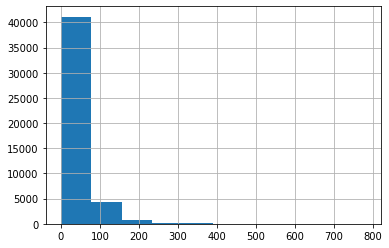

In [108]:
df_crab_weighted.energy.hist()

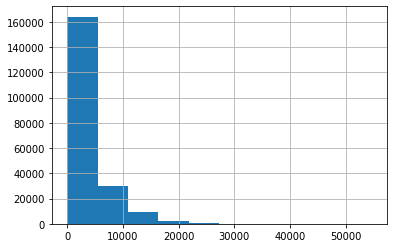

In [109]:
df_albedo_weighted.energy.hist()

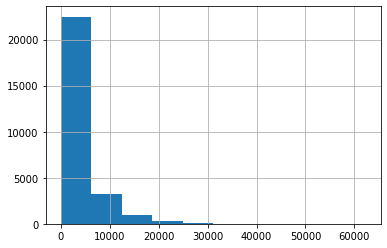

In [110]:
df_cxb_weighted.energy.hist()

In [111]:
df_albedo_weighted.info

<bound method DataFrame.info of         event_num       xpos       ypos      zpos      energy  Class
0               1   8.083280  15.991810  4.998099    35.15456      0
1               2   1.634885  11.671249  4.952261    53.39540      0
2               3  12.971137  24.313104  4.942008    59.81860      0
3               4  14.708836  19.511432  4.962990    60.59620      0
4               5  14.386495   8.386230  4.857602    62.85690      0
...           ...        ...        ...       ...         ...    ...
206559     206560  23.402234   5.004324  0.948301  9729.86010      0
206560     206561  12.641974   3.160365  1.807210  4430.24160      0
206561     206562  11.659167   7.639088  1.856911  6178.61140      0
206562     206563  14.461813  23.366715  3.717900  6672.81300      0
206563     206564  19.324500  25.082800  0.000000   779.28000      0

[206564 rows x 6 columns]>

In [112]:
df_cxb_weighted.info

<bound method DataFrame.info of        event_num       xpos       ypos      zpos       energy  Class
0       527446.0  22.981705   6.014921  2.941340    381.17150      0
1       166258.0  11.270941   4.034315  4.780463     59.48301      0
2      1084655.0  18.516400  12.746400  0.483097     23.98700      0
3      1965259.0  20.304525   8.600719  3.615060  15189.93390      0
4      1157145.0   7.325263  25.818588  1.332080     30.65070      0
...          ...        ...        ...       ...          ...    ...
27050   206331.0   3.324980  21.552818  1.464707    975.55670      0
27051  1740997.0  23.570900   1.027720  3.165290    309.18100      0
27052   266693.0  24.613952  13.198293  4.061154   2244.55460      0
27053   160674.0  17.922300   7.068070  3.122080     29.54290      0
27054  1370631.0   8.491996   8.755415  2.019800  17315.12717      0

[27055 rows x 6 columns]>

In [113]:
df_crab_weighted.info

<bound method DataFrame.info of        event_num       xpos       ypos      zpos      energy  Class
0              1  16.219383  21.640820  0.000039    8.361567      1
1              2  20.336600  25.441600  0.059639   10.157550      1
2              3  10.829700  18.860449  0.017393   10.155360      1
3              4  19.420600  21.127140  0.015608   10.148250      1
4              5   8.069736   1.010647  0.010891   10.178740      1
...          ...        ...        ...       ...         ...    ...
46641      46642   9.554770  11.593600  2.657350  523.814000      1
46642      46643   0.873277   1.504674  0.942454  362.159000      1
46643      46644  22.021909   6.775771  1.904334  330.580500      1
46644      46645   2.766420   8.382900  2.907080  362.999000      1
46645      46646  18.894400   5.079180  2.363920   97.214800      1

[46646 rows x 6 columns]>

In [114]:
df_albedo_weighted = df_albedo_weighted.sample(frac=1).reset_index(drop=True)
df_cxb_weighted = df_cxb_weighted.sample(frac=1).reset_index(drop=True)
df_crab_weighted = df_crab_weighted.sample(frac=1).reset_index(drop=True)
df = pd.DataFrame()
#df = df.iloc[0:0]
#print(df)
df = df.append(df_crab_weighted.iloc[0:40000], ignore_index=True)
df = df.append(df_albedo_weighted.iloc[0:20000], ignore_index=True)
df = df.append(df_cxb_weighted.iloc[0:16000], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop('event_num',axis=1)

In [115]:
df[df["Class"]==1]

,xpos,ypos,zpos,energy,Class
2,22.034373,20.882137,0.001864,13.33059,1
3,24.060800,11.608648,0.638687,22.98890,1
4,3.606609,22.003464,0.008712,11.24881,1
5,18.158490,25.757944,4.872182,58.11600,1
6,18.473961,2.935153,0.015565,12.73899,1
...,...,...,...,...,...
75991,1.986283,5.020294,0.300921,22.89130,1
75992,14.264533,8.962859,0.015578,17.20470,1
75995,1.921230,5.654321,0.021615,18.80470,1
75998,15.821500,23.151332,0.116305,21.75080,1


In [116]:
df = df[(df["xpos"]>=0) & (df["ypos"]>=0) & (df["zpos"]>=0) & (df["energy"]>=0)]

In [117]:
df

,xpos,ypos,zpos,energy,Class
0,18.609396,5.925095,0.401964,1995.526800,0
1,16.253142,3.813119,4.201122,510.999000,0
2,22.034373,20.882137,0.001864,13.330590,1
3,24.060800,11.608648,0.638687,22.988900,1
4,3.606609,22.003464,0.008712,11.248810,1
...,...,...,...,...,...
75995,1.921230,5.654321,0.021615,18.804700,1
75996,25.223570,8.495045,0.704680,959.268400,0
75997,20.378823,1.751636,3.750739,5019.423746,0
75998,15.821500,23.151332,0.116305,21.750800,1


In [118]:
X = df.drop('Class', axis=1)
y = df['Class']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Naive Bayes

In [120]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train, y_train)
end = time.time()

In [121]:
y_pred = mnb.predict(X_test)

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7202
           1       0.84      0.96      0.90      7996

    accuracy                           0.89     15198
   macro avg       0.90      0.88      0.88     15198
weighted avg       0.89      0.89      0.88     15198



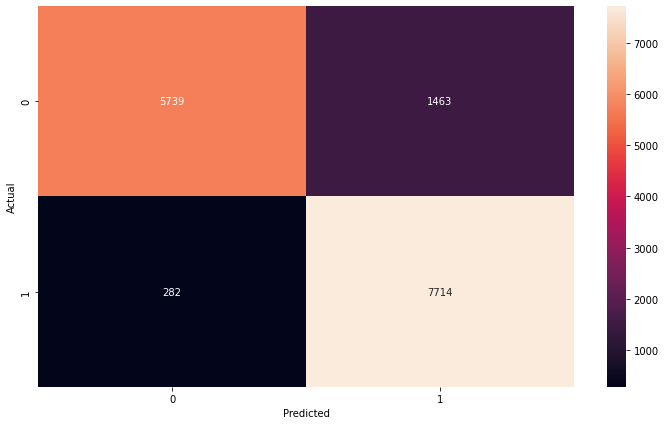

In [123]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [124]:
naive_test = mnb.score(X_test, y_test)
naive_train = mnb.score(X_train, y_train)
naive_time = end - start

## Logistic Regression

In [125]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train, y_train)
end = time.time()

In [126]:
y_pred = lr.predict(X_test)

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7202
           1       0.92      0.96      0.94      7996

    accuracy                           0.93     15198
   macro avg       0.94      0.93      0.93     15198
weighted avg       0.93      0.93      0.93     15198



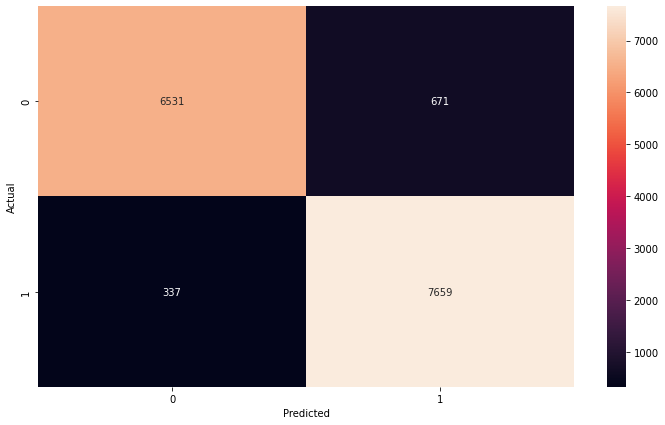

In [128]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [129]:
lr_test = lr.score(X_test, y_test)
lr_train = lr.score(X_train, y_train)
lr_time = end - start

## K-Nearest Neighbours

In [130]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train, y_train)
end = time.time()

In [131]:
y_pred = knn.predict(X_test)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7202
           1       0.92      0.95      0.93      7996

    accuracy                           0.93     15198
   macro avg       0.93      0.93      0.93     15198
weighted avg       0.93      0.93      0.93     15198



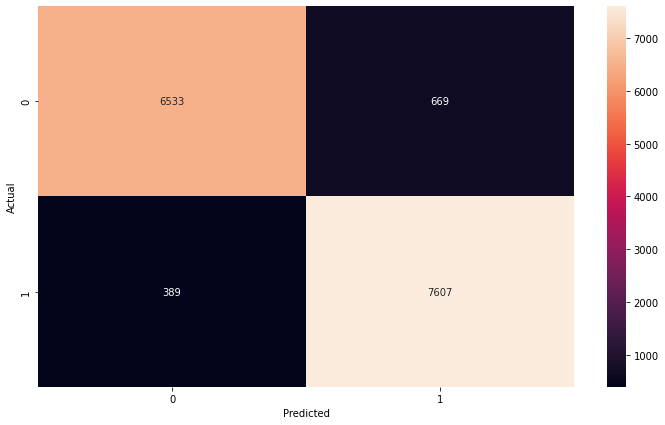

In [133]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [134]:
knn_test = knn.score(X_test, y_test)
knn_train = knn.score(X_train, y_train)
knn_time = end - start

## Decision Tree

In [135]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train, y_train)
end = time.time()

In [136]:
y_pred = classifier.predict(X_test)

In [137]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7202
           1       0.93      0.94      0.93      7996

    accuracy                           0.93     15198
   macro avg       0.93      0.93      0.93     15198
weighted avg       0.93      0.93      0.93     15198



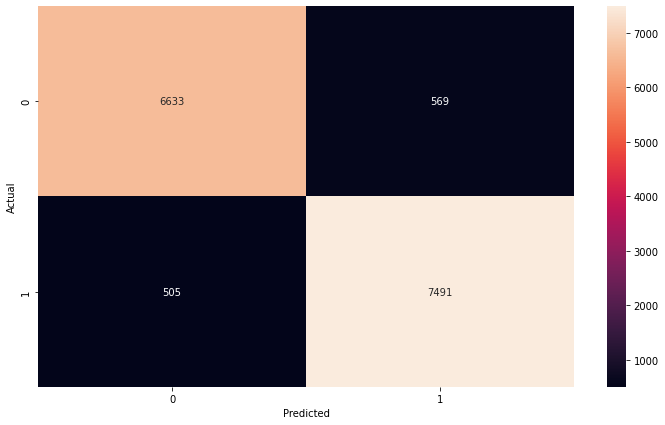

In [138]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [139]:
dtree_test = classifier.score(X_test, y_test)
dtree_train = classifier.score(X_train, y_train)
dtree_time = end - start

### Bagging Decision Tree

In [ ]:
bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
start = time.time()
bg.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = bg.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7104
           1       0.96      0.94      0.95      8093

    accuracy                           0.95     15197
   macro avg       0.95      0.95      0.95     15197
weighted avg       0.95      0.95      0.95     15197



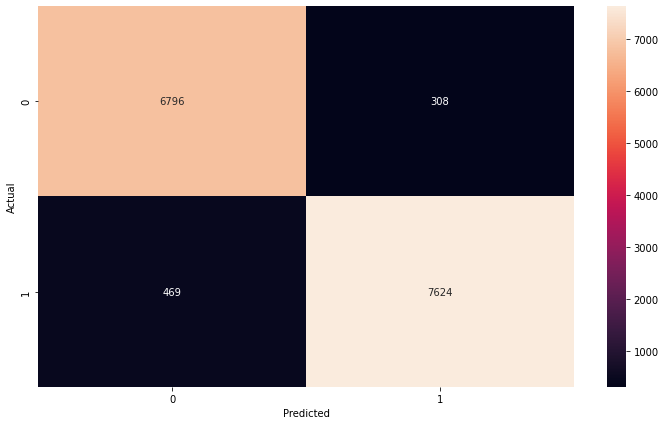

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
bgtree_test = bg.score(X_test, y_test)
bgtree_train = bg.score(X_train, y_train)
bgtree_time = end - start

### Boosted Decision Tree

In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
start = time.time()
adb.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = adb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7104
           1       0.96      0.95      0.96      8093

    accuracy                           0.95     15197
   macro avg       0.95      0.95      0.95     15197
weighted avg       0.95      0.95      0.95     15197



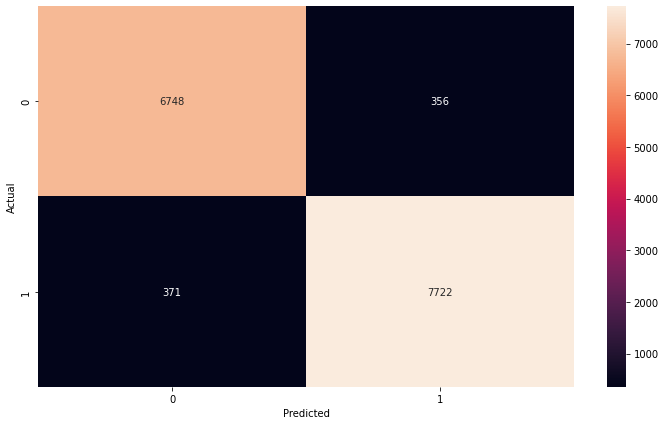

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
boosttree_test = adb.score(X_test, y_test)
boosttree_train = adb.score(X_train, y_train)
boosttree_time = end - start

### Random Forest

In [140]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train,y_train)
end = time.time()
y_pred = clf.predict(X_test)

In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7202
           1       0.96      0.95      0.96      7996

    accuracy                           0.95     15198
   macro avg       0.95      0.95      0.95     15198
weighted avg       0.95      0.95      0.95     15198



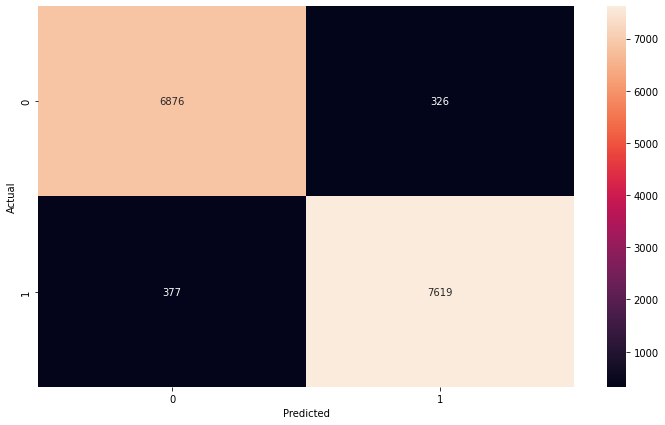

In [142]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [143]:
randomtree_test = clf.score(X_test, y_test)
randomtree_train = clf.score(X_train, y_train)
randomtree_time = end - start

### xG Boost

In [144]:
model = XGBClassifier()
start = time.time()
model.fit(X_train, y_train)
end = time.time()

In [145]:
y_pred = model.predict(X_test)

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7202
           1       0.95      0.96      0.95      7996

    accuracy                           0.95     15198
   macro avg       0.95      0.95      0.95     15198
weighted avg       0.95      0.95      0.95     15198



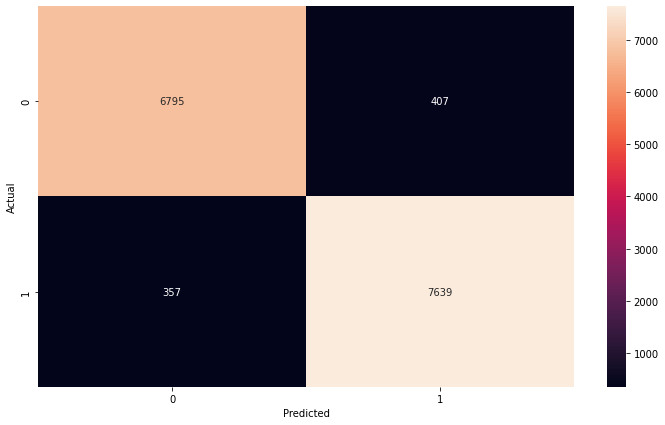

In [147]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [148]:
xg_test = model.score(X_test, y_test)
xg_train = model.score(X_train, y_train)
xg_time = end - start

## SVM

In [ ]:
lin_svclassifier = SVC(kernel='linear')
start = time.time()
lin_svclassifier.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = lin_svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7104
           1       0.93      0.94      0.94      8093

    accuracy                           0.94     15197
   macro avg       0.94      0.93      0.93     15197
weighted avg       0.94      0.94      0.94     15197



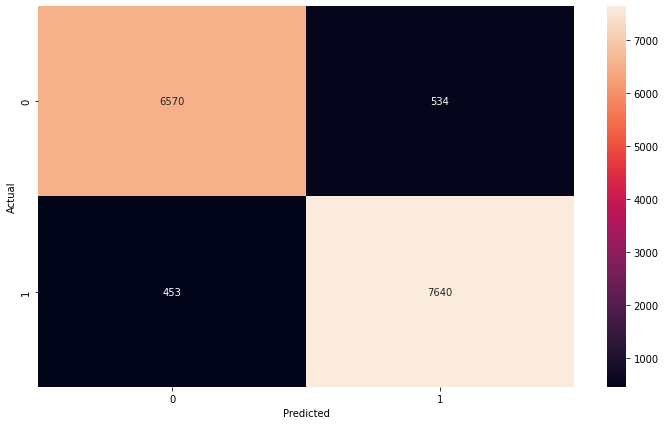

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
lin_svm_test = lin_svclassifier.score(X_test, y_test)
lin_svm_train = lin_svclassifier.score(X_train, y_train)
lin_svm_time = end - start

### Kernel SVM

#### Polynomial Kernel

In [ ]:
poly_svclassifier = SVC(kernel='poly', degree=8)
start = time.time()
poly_svclassifier.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = poly_svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53      7104
           1       0.64      1.00      0.78      8093

    accuracy                           0.70     15197
   macro avg       0.82      0.68      0.66     15197
weighted avg       0.81      0.70      0.66     15197



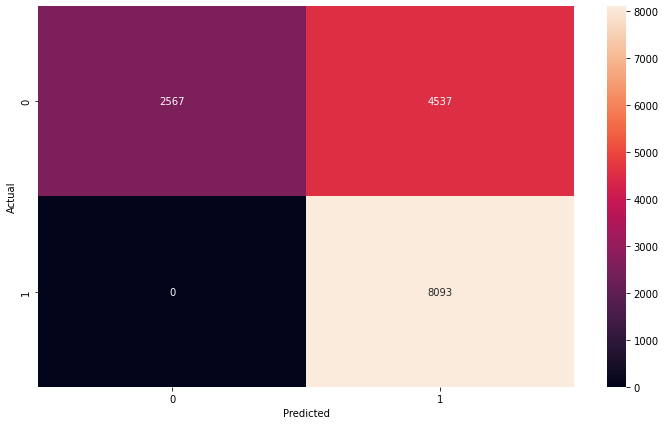

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
poly_svm_test = poly_svclassifier.score(X_test, y_test)
poly_svm_train = poly_svclassifier.score(X_train, y_train)
poly_svm_time = end - start

#### Gaussian Kernel

In [ ]:
g_svclassifier = SVC(kernel='rbf')
start = time.time()
g_svclassifier.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = g_svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      7104
           1       0.88      0.97      0.92      8093

    accuracy                           0.91     15197
   macro avg       0.92      0.91      0.91     15197
weighted avg       0.92      0.91      0.91     15197



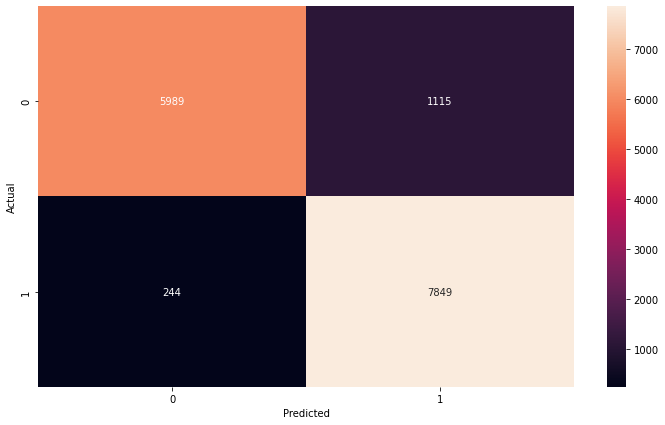

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
gauss_svm_test = g_svclassifier.score(X_test, y_test)
gauss_svm_train = g_svclassifier.score(X_train, y_train)
gauss_svm_time = end - start

#### Sigmoid Kernel

In [ ]:
s_svclassifier = SVC(kernel='sigmoid', random_state =6)
start = time.time()
s_svclassifier.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = s_svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7104
           1       0.89      0.90      0.89      8093

    accuracy                           0.89     15197
   macro avg       0.89      0.89      0.89     15197
weighted avg       0.89      0.89      0.89     15197



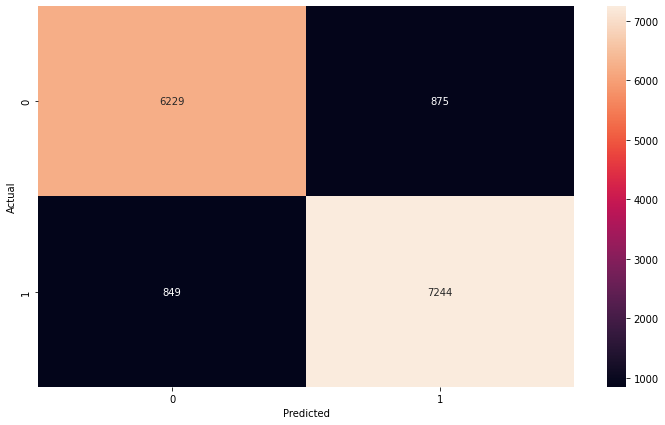

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
sig_svm_test = s_svclassifier.score(X_test, y_test)
sig_svm_train = s_svclassifier.score(X_train, y_train)
sig_svm_time = end - start

## Random Fourier Features

In [ ]:
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features_train = rbf_feature.fit_transform(X_train)
X_features_test = rbf_feature.fit_transform(X_test)

In [ ]:
clf2=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf2.fit(X_train,y_train)
end = time.time()
y_pred = clf2.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7104
           1       0.96      0.95      0.96      8093

    accuracy                           0.95     15197
   macro avg       0.95      0.95      0.95     15197
weighted avg       0.95      0.95      0.95     15197



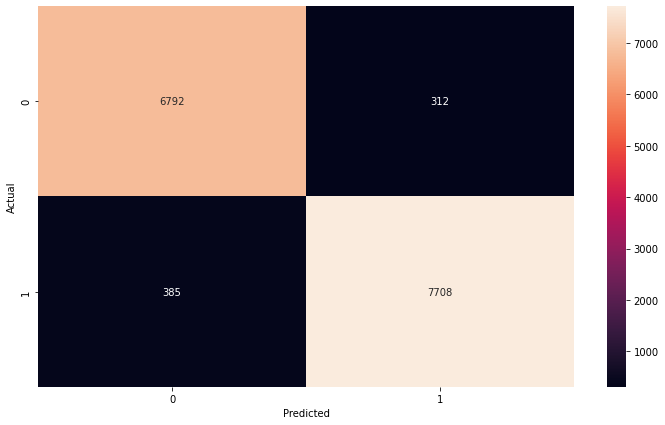

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
rff_test = clf2.score(X_test, y_test)
rff_train = clf2.score(X_train, y_train)
rff_time = end - start

## Voting Classification

In [ ]:
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('clf',clf),('xgboost',model),('svm',lin_svclassifier),('gauss',g_svclassifier)],voting='hard')
start = time.time()
evc.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = evc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7104
           1       0.93      0.95      0.94      8093

    accuracy                           0.94     15197
   macro avg       0.94      0.94      0.94     15197
weighted avg       0.94      0.94      0.94     15197



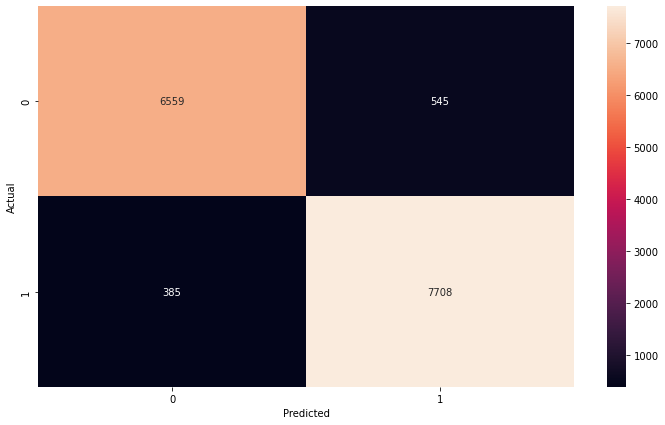

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
evc_test = evc.score(X_test, y_test)
evc_train = evc.score(X_train, y_train)
evc_time = end - start

# COMPARISON

## table maker


In [ ]:
from prettytable import PrettyTable

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Naive Bayes', naive_train,naive_test,naive_time])
x.add_row(['Log. Regression', lr_train,lr_test,lr_time])
x.add_row(['KNN', knn_train,knn_test,knn_time])
x.add_row(['Decision Tree', dtree_train,dtree_test,dtree_time])
x.add_row(['Bagging DT', bgtree_train,bgtree_test,bgtree_time])
x.add_row(['Boosted DT', boosttree_train,boosttree_test,boosttree_time])
x.add_row(['Random Forest', randomtree_train,randomtree_test,randomtree_time])
x.add_row(['xG Boost', xg_train,xg_test,xg_time])
x.add_row(['Linear SVM', lin_svm_train,lin_svm_test,lin_svm_time])
x.add_row(['Poly. Kernel SVM', poly_svm_train,poly_svm_test,poly_svm_time])
x.add_row(['Gaus. Kernel SVM', gauss_svm_train,gauss_svm_test,gauss_svm_time])
x.add_row(['Sig. Kernel SVM', sig_svm_train,sig_svm_test,sig_svm_time])
x.add_row(['Random Fourier Features', rff_train,rff_test,rff_time])
x.add_row(['Voting Classification', evc_train,evc_test,evc_time])


In [ ]:
results = [['Naive Bayes', naive_train,naive_test,naive_time],
           ['Log. Regression', lr_train,lr_test,lr_time],
           ['KNN', knn_train,knn_test,knn_time],
           ['Decision Tree', dtree_train,dtree_test,dtree_time],
           ['Bagging DT', bgtree_train,bgtree_test,bgtree_time],
           ['Boosted DT', boosttree_train,boosttree_test,boosttree_time],
           ['Random Forest', randomtree_train,randomtree_test,randomtree_time],
           ['xG Boost', xg_train,xg_test,xg_time],
           ['Linear SVM', lin_svm_train,lin_svm_test,lin_svm_time],
           ['Poly. Kernel SVM', poly_svm_train,poly_svm_test,poly_svm_time],
           ['Gaus. Kernel SVM', gauss_svm_train,gauss_svm_test,gauss_svm_time],
           ['Sig. Kernel SVM', sig_svm_train,sig_svm_test,sig_svm_time],
           ['Random Fourier Features', rff_train,rff_test,rff_time],
           ['Voting Classification', evc_train,evc_test,evc_time]]

In [ ]:
from operator import itemgetter

sorted_results = sorted(results, key=itemgetter(1))

In [ ]:
names = []
for i in sorted_results:
  names.append(i[0])

In [ ]:
train_score = []
for i in sorted_results:
  train_score.append(i[1])

In [ ]:
test_score = []
for i in sorted_results:
  test_score.append(i[2])

## RESULTS

In [ ]:
print(x)

+-----------------------------+------------------------+------------------------+--------------------------+
|            Models           |      Train Score       |       Test Score       |           Time           |
+-----------------------------+------------------------+------------------------+--------------------------+
|         Naive Bayes         |   0.8816958410107923   |   0.885108903072975    |   0.030114173889160156   |
|       Log. Regression       |   0.9303270597525665   |   0.9322234651575969   |    0.609877347946167     |
|             KNN             |   0.9462687549355093   |   0.9320918602355728   |   0.01018524169921875    |
|        Decision Tree        |          1.0           |   0.930907415937356    |    0.6356639862060547    |
|          Bagging DT         |   0.9788595683074494   |   0.9488714877936435   |    2.106945514678955     |
|          Boosted DT         |   0.9521255593577257   |   0.9521616108442456   |     2.00909161567688     |
|        Random For

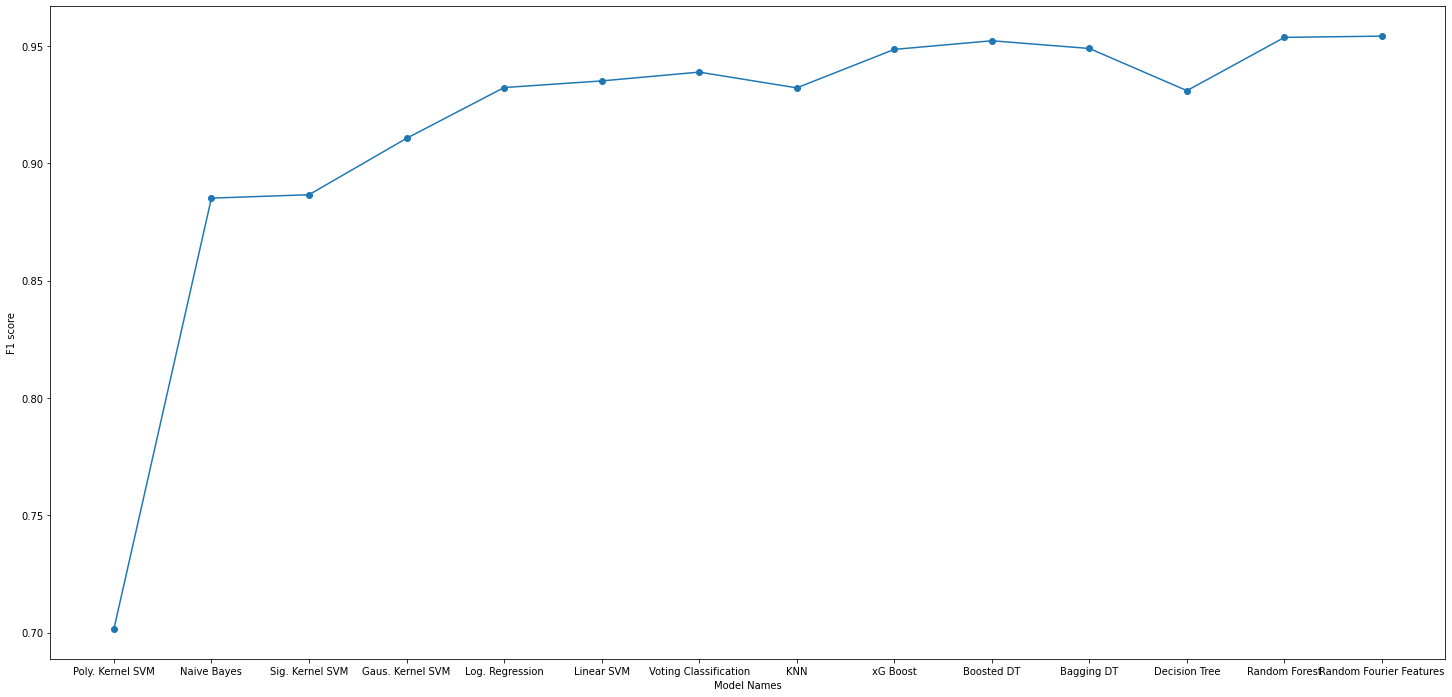

In [ ]:
fig, ax = plt.subplots(figsize=(25, 12))

ax.scatter(names, test_score)
ax.plot(names, test_score)

plt.xlabel("Model Names")
plt.ylabel("F1 score")
plt.show()

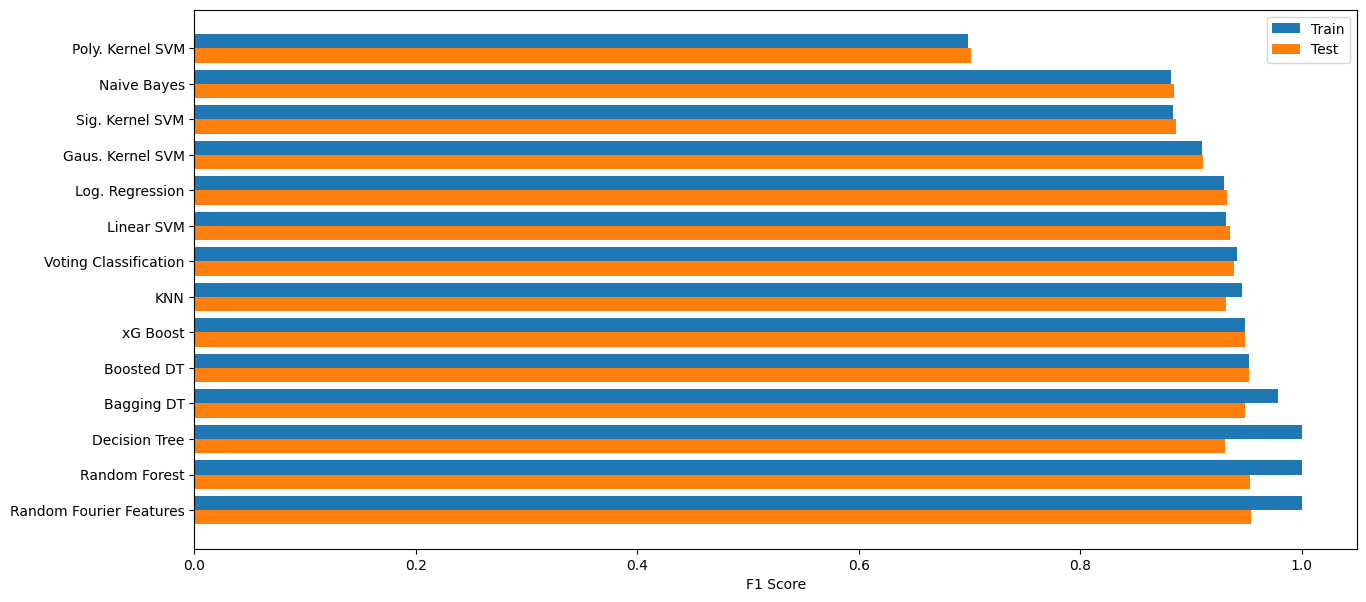

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names))

ax.barh(y_pos-0.2, train_score, 0.4, label = 'Train')
ax.barh(y_pos+0.2, test_score, 0.4, label = 'Test')


ax.set_yticks(y_pos)
ax.set_yticklabels( names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('F1 Score')

plt.legend()
plt.show()

# CLASSIFICATION (with low precision data)

1: Source Data
0: Background Data

with an energy threshold > 45 keV and < 800 keV

## Train-Test data split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import VotingClassifier

In [ ]:
df_crab_weighted = df_crab_weighted[(df_crab_weighted["energy"] >= 45) & (df_crab_weighted["energy"] <= 800)]
df_crab_weighted["Class"] = 1
df_albedo_weighted = df_albedo_weighted[(df_albedo_weighted["energy"] >= 45) & (df_albedo_weighted["energy"] <= 800)]
df_albedo_weighted["Class"] = 0
df_cxb_weighted = df_cxb_weighted[(df_cxb_weighted["energy"] >= 45) & (df_cxb_weighted["energy"] <= 800)]
df_cxb_weighted["Class"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

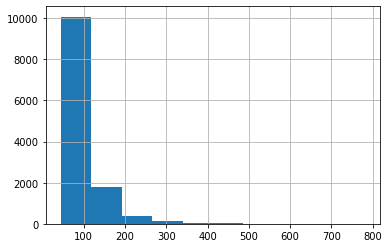

In [ ]:
df_crab_weighted.energy.hist()

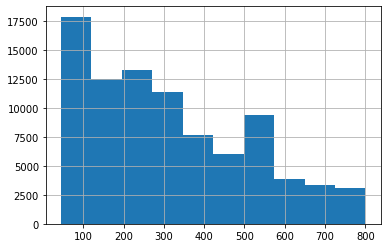

In [ ]:
df_albedo_weighted.energy.hist()

In [ ]:
df_albedo_weighted = df_albedo_weighted.sample(frac=1).reset_index(drop=True)
df_cxb_weighted = df_cxb_weighted.sample(frac=1).reset_index(drop=True)
df_crab_weighted = df_crab_weighted.sample(frac=1).reset_index(drop=True)
df = df.iloc[0:0]
#print(df)
df = df.append(df_crab_weighted.iloc[0:10000], ignore_index=True)
df = df.append(df_albedo_weighted.iloc[0:5000], ignore_index=True)
df = df.append(df_cxb_weighted.iloc[0:4000], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop('event_num',axis=1)

In [ ]:
df

,xpos,ypos,zpos,energy,Class
0,10.486435,6.571976,2.011548,256.78300,0
1,13.501592,18.469054,1.951193,225.56100,0
2,22.588900,9.595570,2.929740,621.69400,0
3,8.414705,0.607885,2.963067,80.81602,1
4,0.051019,16.806200,0.764417,106.65700,0
...,...,...,...,...,...
18995,3.671487,11.701352,1.261603,510.99850,0
18996,23.954856,7.783745,0.453395,63.35110,1
18997,6.464593,3.710905,4.768731,59.48300,0
18998,16.989618,13.889528,0.105408,56.67360,1


In [ ]:
df = df[(df["xpos"]>=0) & (df["ypos"]>=0) & (df["zpos"]>=0) & (df["energy"]>=0)]

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy["xpos3"] = round(df_copy["xpos"],3)
df_copy["ypos3"] = round(df_copy["ypos"],3)
df_copy["zpos3"] = round(df_copy["zpos"],3)

df_copy["xpos1"] = round(df_copy["xpos"],1)
df_copy["ypos1"] = round(df_copy["ypos"],1)
df_copy["zpos1"] = round(df_copy["zpos"],1)

df_copy["xpos0"] = round(df_copy["xpos"])
df_copy["ypos0"] = round(df_copy["ypos"])
df_copy["zpos0"] = round(df_copy["zpos"])


In [ ]:
df_p1 = df_copy[["xpos3","ypos3","zpos3","energy",'Class']]
df_p2 = df_copy[["xpos1","ypos1","zpos1","energy",'Class']]
df_p3 = df_copy[["xpos0","ypos0","zpos0","energy",'Class']]

In [ ]:
X_1 = df_p1.drop('Class', axis=1)
y_1 = df_p1['Class']

X_2 = df_p2.drop('Class', axis=1)
y_2 = df_p2['Class']

X_3 = df_p3.drop('Class', axis=1)
y_3 = df_p3['Class']


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.2)

## Naive Bayes

In [ ]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_1, y_train_1)
end = time.time()

In [ ]:
y_pred_1 = mnb.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1769
           1       0.77      0.82      0.79      2031

    accuracy                           0.77      3800
   macro avg       0.77      0.77      0.77      3800
weighted avg       0.77      0.77      0.77      3800



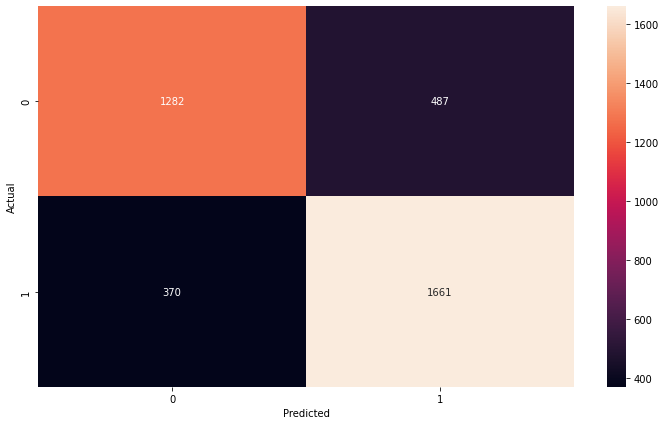

In [ ]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
naive_test_1 = mnb.score(X_test_1, y_test_1)
naive_train_1 = mnb.score(X_train_1, y_train_1)
naive_time_1 = end - start

In [ ]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_2, y_train_2)
end = time.time()

In [ ]:
y_pred_2 = mnb.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1800
           1       0.77      0.83      0.80      2000

    accuracy                           0.78      3800
   macro avg       0.78      0.77      0.78      3800
weighted avg       0.78      0.78      0.78      3800



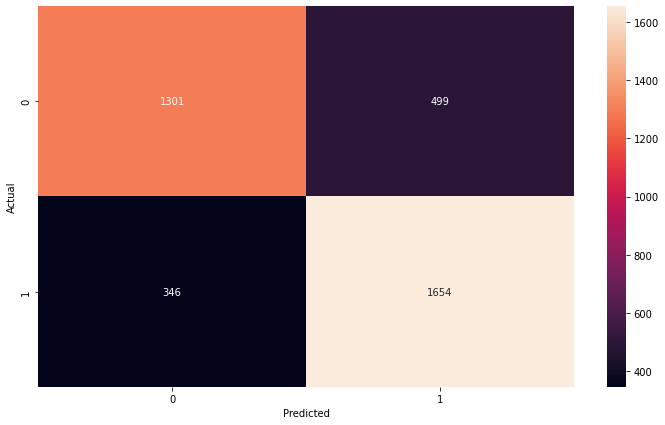

In [ ]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
naive_test_2 = mnb.score(X_test_2, y_test_2)
naive_train_2 = mnb.score(X_train_2, y_train_2)
naive_time_2 = end - start

In [ ]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_3, y_train_3)
end = time.time()

In [ ]:
y_pred_3 = mnb.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1807
           1       0.76      0.81      0.79      1993

    accuracy                           0.77      3800
   macro avg       0.77      0.77      0.77      3800
weighted avg       0.77      0.77      0.77      3800



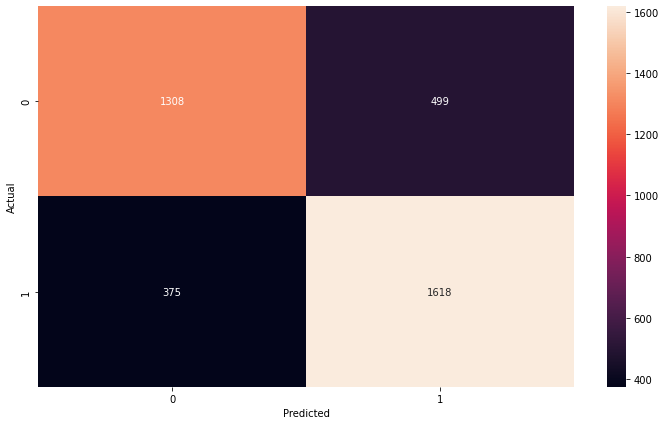

In [ ]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
naive_test_3 = mnb.score(X_test_3, y_test_3)
naive_train_3 = mnb.score(X_train_3, y_train_3)
naive_time_3 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original data', naive_train,naive_test,naive_time])
x.add_row(['Data 1', naive_train_1,naive_test_1,naive_time_1])
x.add_row(['Data 2', naive_train_2,naive_test_2,naive_time_2])
x.add_row(['Data 3', naive_train_3,naive_test_3,naive_time_3])

print(x)

+-------------------+------------------------+------------------------+--------------------------+
|       Models      |      Train Score       |       Test Score       |           Time           |
+-------------------+------------------------+------------------------+--------------------------+
|   Original data   |   0.8836206896551724   |   0.8875435941304205   |   0.035050392150878906   |
|       Data 1      |   0.7760594893392998   |   0.7744736842105263   |   0.007345438003540039   |
|       Data 2      |   0.7752698078441695   |   0.7776315789473685   |   0.00677800178527832    |
|       Data 3      |   0.7775072387470386   |          0.77          |   0.006351470947265625   |
+-------------------+------------------------+------------------------+--------------------------+


## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_1, y_train_1)
end = time.time()

In [ ]:
y_pred_1 = lr.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1769
           1       0.83      0.87      0.85      2031

    accuracy                           0.83      3800
   macro avg       0.83      0.83      0.83      3800
weighted avg       0.83      0.83      0.83      3800



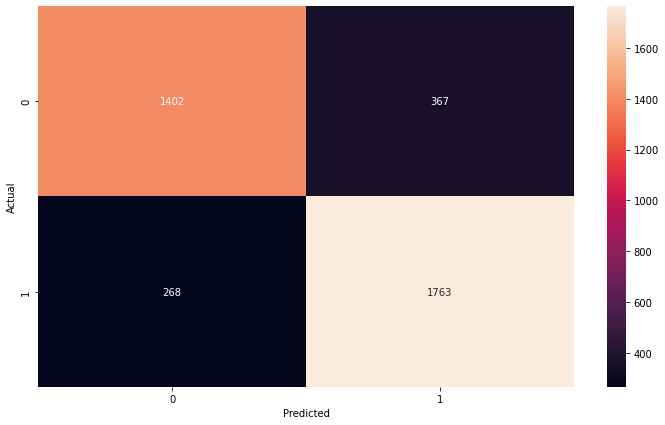

In [ ]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
lr_test_1 = lr.score(X_test_1, y_test_1)
lr_train_1= lr.score(X_train_1, y_train_1)
lr_time_1 = end - start

In [ ]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_2, y_train_2)
end = time.time()

In [ ]:
y_pred_2 = lr.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1800
           1       0.83      0.88      0.86      2000

    accuracy                           0.85      3800
   macro avg       0.85      0.84      0.84      3800
weighted avg       0.85      0.85      0.84      3800



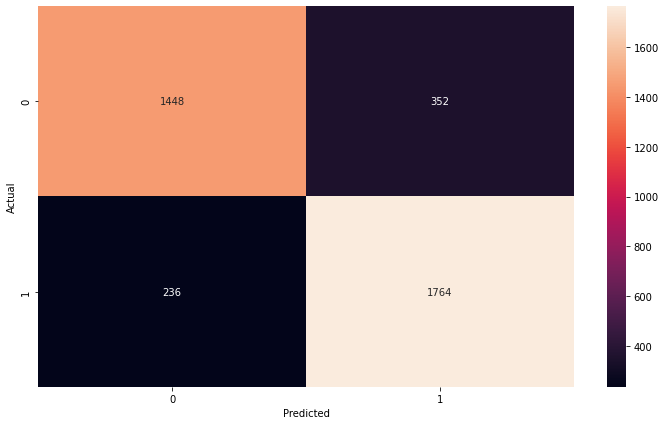

In [ ]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
lr_test_2 = lr.score(X_test_2, y_test_2)
lr_train_2 = lr.score(X_train_2, y_train_2)
lr_time_2 = end - start

In [ ]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_3, y_train_3)
end = time.time()

In [ ]:
y_pred_3 = lr.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1807
           1       0.82      0.87      0.84      1993

    accuracy                           0.83      3800
   macro avg       0.83      0.83      0.83      3800
weighted avg       0.83      0.83      0.83      3800



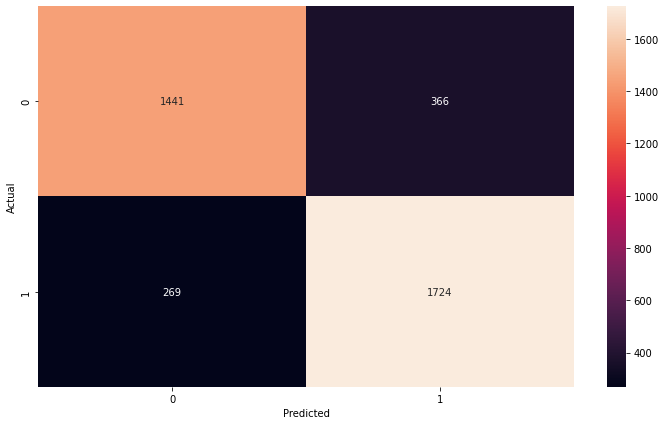

In [ ]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
lr_test_3 = lr.score(X_test_3, y_test_3)
lr_train_3 = lr.score(X_train_3, y_train_3)
lr_time_3 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', lr_train,lr_test,lr_time])
x.add_row(['Data 1', lr_train_1,lr_test_1,lr_time_1])
x.add_row(['Data 2', lr_train_2,lr_test_2,lr_time_2])
x.add_row(['Data 3', lr_train_3,lr_test_3,lr_time_3])

print(x)

+-------------------+------------------------+------------------------+-------------------------+
|       Models      |      Train Score       |       Test Score       |           Time          |
+-------------------+------------------------+------------------------+-------------------------+
|   Original Data   |   0.9311825480389576   |   0.9318944528525367   |    0.503551721572876    |
|       Data 1      |   0.8477230850223743   |   0.8328947368421052   |   0.12512755393981934   |
|       Data 2      |   0.8452224269544617   |   0.8452631578947368   |   0.10988020896911621   |
|       Data 3      |   0.8468675967359831   |   0.8328947368421052   |   0.10767292976379395   |
+-------------------+------------------------+------------------------+-------------------------+


## K-Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_1, y_train_1)
end = time.time()

In [ ]:
y_pred_1 = knn.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1769
           1       0.82      0.86      0.84      2031

    accuracy                           0.82      3800
   macro avg       0.82      0.82      0.82      3800
weighted avg       0.82      0.82      0.82      3800



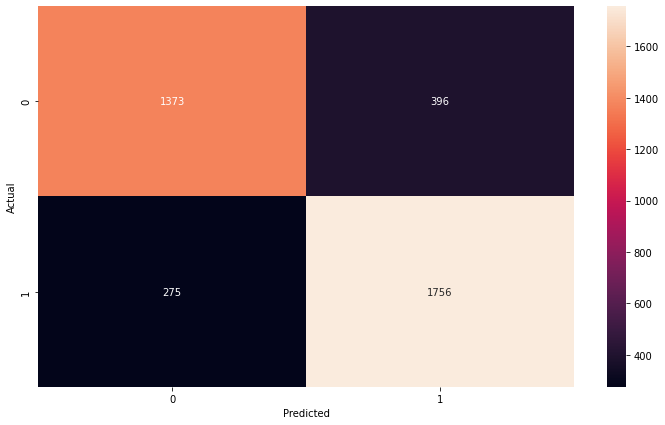

In [ ]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
knn_test_1 = knn.score(X_test_1, y_test_1)
knn_train_1 = knn.score(X_train_1, y_train_1)
knn_time_1 = end - start

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_2, y_train_2)
end = time.time()

In [ ]:
y_pred_2 = knn.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1800
           1       0.82      0.88      0.85      2000

    accuracy                           0.83      3800
   macro avg       0.84      0.83      0.83      3800
weighted avg       0.84      0.83      0.83      3800



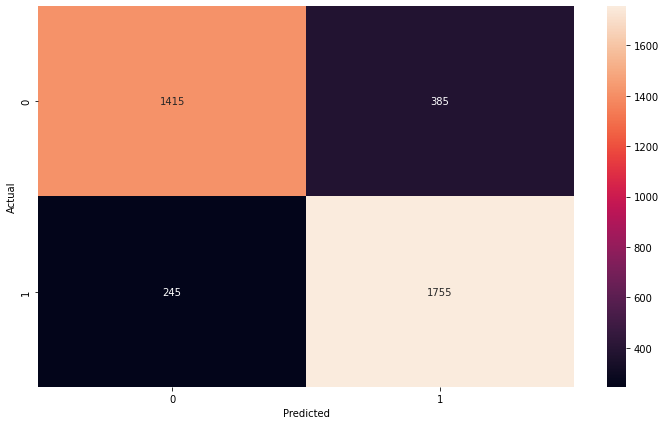

In [ ]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
knn_test_2 = knn.score(X_test_2, y_test_2)
knn_train_2 = knn.score(X_train_2, y_train_2)
knn_time_2 = end - start

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_3, y_train_3)
end = time.time()

In [ ]:
y_pred_3 = knn.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1807
           1       0.82      0.87      0.84      1993

    accuracy                           0.83      3800
   macro avg       0.83      0.83      0.83      3800
weighted avg       0.83      0.83      0.83      3800



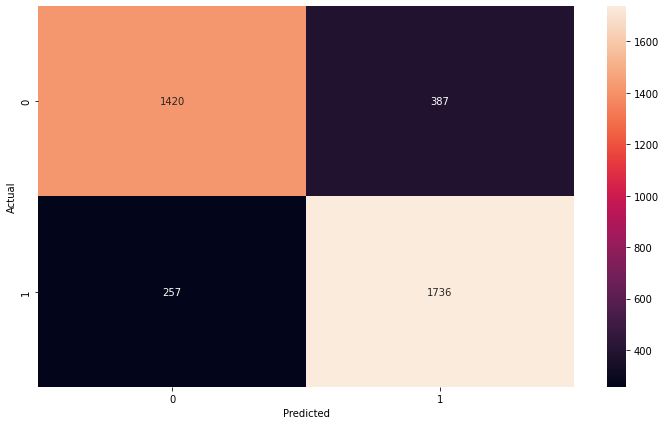

In [ ]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
knn_test_3 = knn.score(X_test_3, y_test_3)
knn_train_3 = knn.score(X_train_3, y_train_3)
knn_time_3 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', knn_train,knn_test,knn_time])
x.add_row(['Data 1', knn_train_1,knn_test_1,knn_time_1])
x.add_row(['Data 2', knn_train_2,knn_test_2,knn_time_2])
x.add_row(['Data 3', knn_train_3,knn_test_3,knn_time_3])

print(x)

+-------------------+------------------------+------------------------+---------------------------+
|       Models      |      Train Score       |       Test Score       |            Time           |
+-------------------+------------------------+------------------------+---------------------------+
|   Original Data   |   0.9477658594366939   |   0.9330130946897414   |    0.008445978164672852   |
|       Data 1      |   0.8821400368518031   |   0.8234210526315789   |   0.0034873485565185547   |
|       Data 2      |   0.8783232429586734   |   0.8342105263157895   |    0.006272792816162109   |
|       Data 3      |   0.8795077652013688   |   0.8305263157894737   |    0.00402379035949707    |
+-------------------+------------------------+------------------------+---------------------------+


## Decision Tree

In [ ]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_1, y_train_1)
end = time.time()

In [ ]:
y_pred_1 = classifier.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1769
           1       0.84      0.82      0.83      2031

    accuracy                           0.82      3800
   macro avg       0.82      0.82      0.82      3800
weighted avg       0.82      0.82      0.82      3800



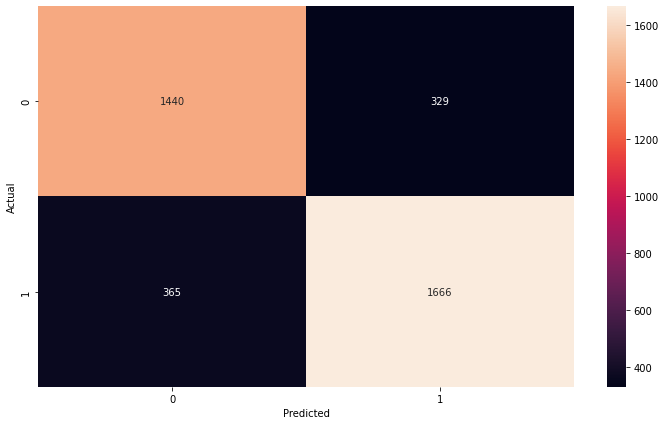

In [ ]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
dtree_test_1 = classifier.score(X_test_1, y_test_1)
dtree_train_1 = classifier.score(X_train_1, y_train_1)
dtree_time_1 = end - start

In [ ]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_2, y_train_2)
end = time.time()

In [ ]:
y_pred_2 = classifier.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1800
           1       0.83      0.86      0.84      2000

    accuracy                           0.83      3800
   macro avg       0.83      0.83      0.83      3800
weighted avg       0.83      0.83      0.83      3800



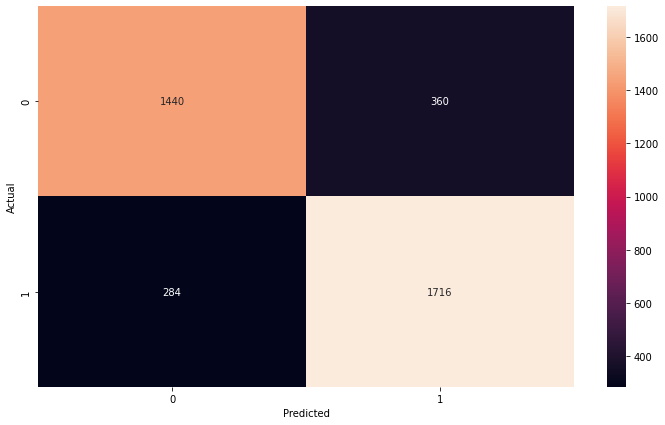

In [ ]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
dtree_test_2 = classifier.score(X_test_2, y_test_2)
dtree_train_2 = classifier.score(X_train_2, y_train_2)
dtree_time_2 = end - start

In [ ]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_3, y_train_3)
end = time.time()

In [ ]:
y_pred_3 = classifier.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1807
           1       0.82      0.84      0.83      1993

    accuracy                           0.82      3800
   macro avg       0.82      0.82      0.82      3800
weighted avg       0.82      0.82      0.82      3800



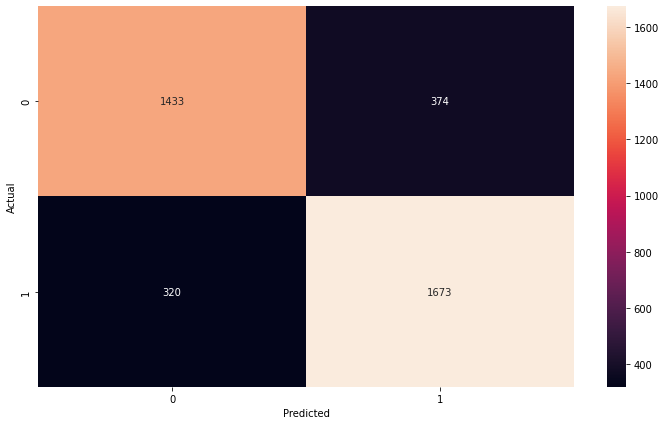

In [ ]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
dtree_test_3 = classifier.score(X_test_3, y_test_3)
dtree_train_3 = classifier.score(X_train_3, y_train_3)
dtree_time_3 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3


x.add_row(['Original Data', dtree_train,dtree_test,dtree_time])
x.add_row(['Data 1', dtree_train_1,dtree_test_1,dtree_time_1])
x.add_row(['Data 2', dtree_train_2,dtree_test_2,dtree_time_2])
x.add_row(['Data 3', dtree_train_3,dtree_test_3,dtree_time_3])

print(x)

+-------------------+------------------------+------------------------+-------------------------+
|       Models      |      Train Score       |       Test Score       |           Time          |
+-------------------+------------------------+------------------------+-------------------------+
|   Original Data   |          1.0           |   0.9333421069948016   |    0.5691704750061035   |
|       Data 1      |          1.0           |   0.8173684210526316   |   0.11144876480102539   |
|       Data 2      |          1.0           |   0.8305263157894737   |   0.06609916687011719   |
|       Data 3      |   0.9997367728349565   |   0.8173684210526316   |   0.05326199531555176   |
+-------------------+------------------------+------------------------+-------------------------+


## Random Forest

In [ ]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_1,y_train_1)
end = time.time()
y_pred_1 = clf.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1769
           1       0.89      0.87      0.88      2031

    accuracy                           0.87      3800
   macro avg       0.87      0.87      0.87      3800
weighted avg       0.87      0.87      0.87      3800



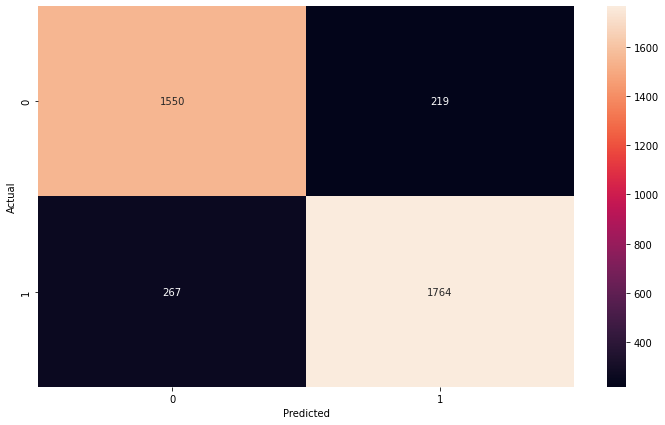

In [ ]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
randomtree_test_1 = clf.score(X_test_1, y_test_1)
randomtree_train_1 = clf.score(X_train_1, y_train_1)
randomtree_time_1 = end - start

In [ ]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_2,y_train_2)
end = time.time()
y_pred_2 = clf.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1800
           1       0.88      0.89      0.89      2000

    accuracy                           0.88      3800
   macro avg       0.88      0.88      0.88      3800
weighted avg       0.88      0.88      0.88      3800



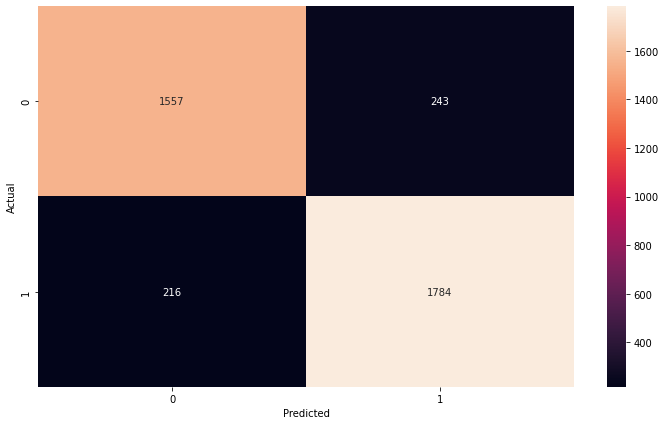

In [ ]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
randomtree_test_2 = clf.score(X_test_2, y_test_2)
randomtree_train_2 = clf.score(X_train_2, y_train_2)
randomtree_time_2 = end - start

In [ ]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_3,y_train_3)
end = time.time()
y_pred_3 = clf.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1807
           1       0.87      0.87      0.87      1993

    accuracy                           0.86      3800
   macro avg       0.86      0.86      0.86      3800
weighted avg       0.86      0.86      0.86      3800



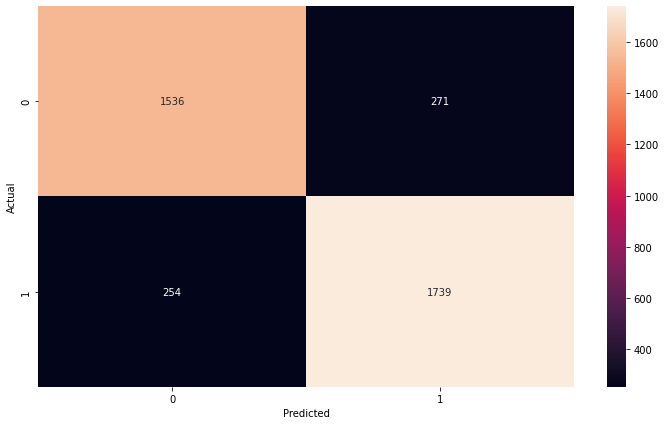

In [ ]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
randomtree_test_3 = clf.score(X_test_3, y_test_3)
randomtree_train_3 = clf.score(X_train_3, y_train_3)
randomtree_time_3 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', randomtree_train,randomtree_test,randomtree_time])
x.add_row(['Data 1', randomtree_train_1,randomtree_test_1,randomtree_time_1])
x.add_row(['Data 2', randomtree_train_2,randomtree_test_2,randomtree_time_2])
x.add_row(['Data 3', randomtree_train_3,randomtree_test_3,randomtree_time_3])
print(x)

+-------------------+------------------------+------------------------+------------------------+
|       Models      |      Train Score       |       Test Score       |          Time          |
+-------------------+------------------------+------------------------+------------------------+
|   Original Data   |          1.0           |   0.9530828452984141   |   82.64316606521606    |
|       Data 1      |          1.0           |   0.8721052631578947   |   18.003441095352173   |
|       Data 2      |          1.0           |   0.8792105263157894   |   11.117926359176636   |
|       Data 3      |   0.9997367728349565   |   0.8618421052631579   |    8.36271858215332    |
+-------------------+------------------------+------------------------+------------------------+


## xG Boost

In [ ]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_1, y_train_1)
end = time.time()

In [ ]:
y_pred_1 = model.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1769
           1       0.88      0.88      0.88      2031

    accuracy                           0.87      3800
   macro avg       0.87      0.87      0.87      3800
weighted avg       0.87      0.87      0.87      3800



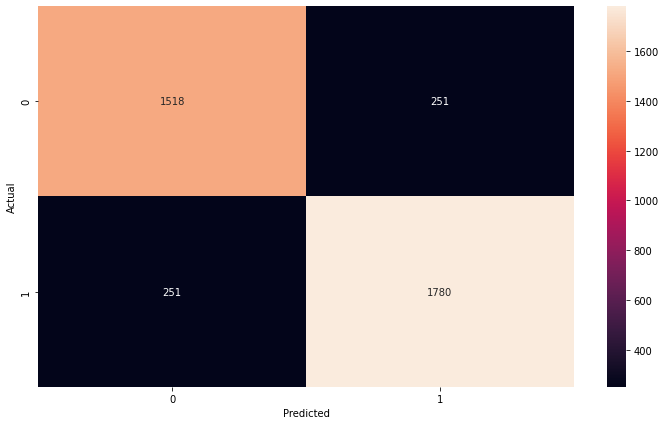

In [ ]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
xg_test_1 = model.score(X_test_1, y_test_1)
xg_train_1 = model.score(X_train_1, y_train_1)
xg_time_1 = end - start

In [ ]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_2, y_train_2)
end = time.time()

In [ ]:
y_pred_2 = model.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1800
           1       0.88      0.89      0.89      2000

    accuracy                           0.88      3800
   macro avg       0.88      0.88      0.88      3800
weighted avg       0.88      0.88      0.88      3800



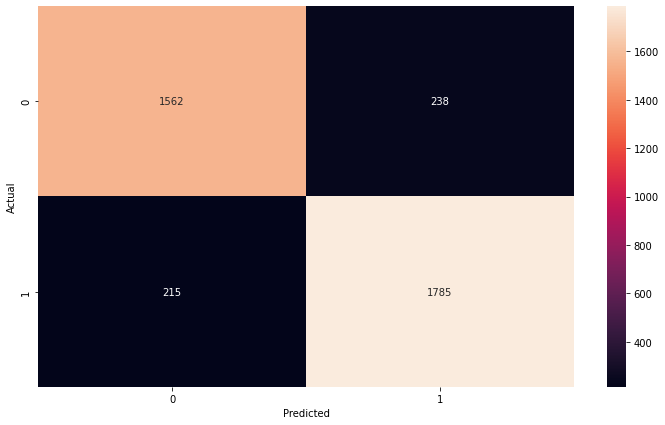

In [ ]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
xg_test_2 = model.score(X_test_2, y_test_2)
xg_train_2 = model.score(X_train_2, y_train_2)
xg_time_2 = end - start

In [ ]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_3, y_train_3)
end = time.time()

In [ ]:
y_pred_3 = model.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1807
           1       0.87      0.87      0.87      1993

    accuracy                           0.86      3800
   macro avg       0.86      0.86      0.86      3800
weighted avg       0.86      0.86      0.86      3800



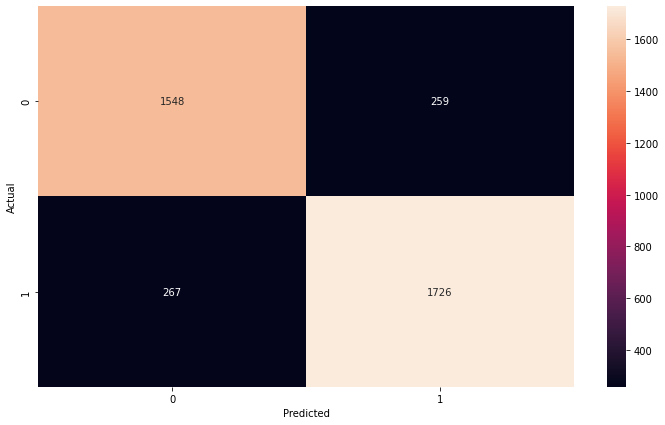

In [ ]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
xg_test_3 = model.score(X_test_3, y_test_3)
xg_train_3 = model.score(X_train_3, y_train_3)
xg_time_3 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', xg_train,xg_test,xg_time])
x.add_row(['Data 1', xg_train_1,xg_test_1,xg_time_1])
x.add_row(['Data 2', xg_train_2,xg_test_2,xg_time_2])
x.add_row(['Data 3', xg_train_3,xg_test_3,xg_time_3])
print(x)

+-------------------+------------------------+------------------------+------------------------+
|       Models      |      Train Score       |       Test Score       |          Time          |
+-------------------+------------------------+------------------------+------------------------+
|   Original Data   |   0.9490655435640958   |   0.9490030927156675   |   2.7042551040649414   |
|       Data 1      |   0.8811529349828903   |   0.8678947368421053   |   0.6218807697296143   |
|       Data 2      |   0.8821400368518031   |   0.8807894736842106   |   0.4871690273284912   |
|       Data 3      |   0.8802974466964991   |   0.861578947368421    |   0.4707977771759033   |
+-------------------+------------------------+------------------------+------------------------+


# Comparison

In [ ]:

names2 = ['Naive Bayes','Log. Regression','KNN','Decision Tree','Random Forest','xG Boost']

score = [naive_test,lr_test,knn_test,dtree_test,randomtree_test,xg_test]
score1 = [naive_test_1,lr_test_1,knn_test_1,dtree_test_1,randomtree_test_1,xg_test_1]
score2 = [naive_test_2,lr_test_2,knn_test_2,dtree_test_2,randomtree_test_2,xg_test_2]
score3 = [naive_test_3,lr_test_3,knn_test_3,dtree_test_3,randomtree_test_3,xg_test_3]

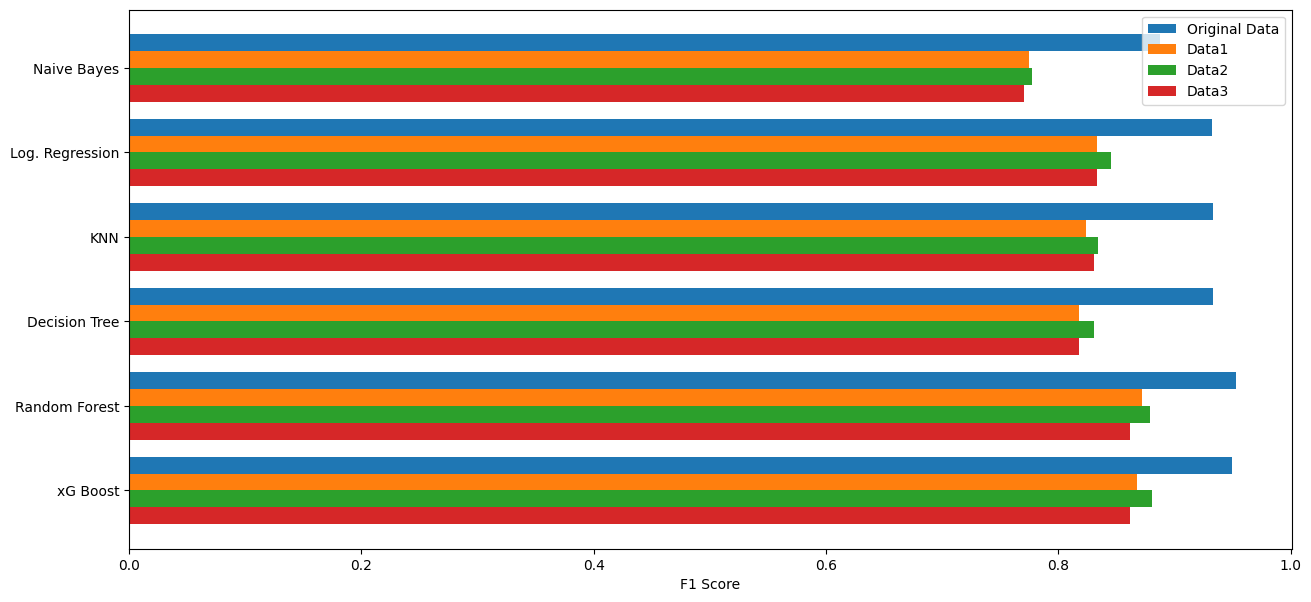

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names2))

ax.barh(y_pos-0.3, score, 0.2, label = 'Original Data')
ax.barh(y_pos-0.1, score1, 0.2, label = 'Data1')
ax.barh(y_pos+0.1, score2, 0.2, label = 'Data2')
ax.barh(y_pos+0.3, score3, 0.2, label = 'Data3')


ax.set_yticks(y_pos)
ax.set_yticklabels( names2)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('F1 Score')

plt.legend()
plt.show()

# CLASSIFICATION (with energy treshold)

1: Source Data
0: Background Data

with an energy threshold 

## Train-Test data split

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import VotingClassifier

In [44]:
df_crab_weighted_1= df_crab_weighted[(df_crab_weighted["energy"] >= 45) & (df_crab_weighted["energy"] <= 800)]
df_crab_weighted_1["Class"] = 1
df_albedo_weighted_1 = df_albedo_weighted[(df_albedo_weighted["energy"] >= 45) & (df_albedo_weighted["energy"] <= 800)]
df_albedo_weighted_1["Class"] = 0
df_cxb_weighted_1 = df_cxb_weighted[(df_cxb_weighted["energy"] >= 45) & (df_cxb_weighted["energy"] <= 800)]
df_cxb_weighted_1["Class"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [45]:
df_crab_weighted_2= df_crab_weighted[(df_crab_weighted["energy"] >= 45) & (df_crab_weighted["energy"] <= 500)]
df_crab_weighted_2["Class"] = 1
df_albedo_weighted_2 = df_albedo_weighted[(df_albedo_weighted["energy"] >= 45) & (df_albedo_weighted["energy"] <= 500)]
df_albedo_weighted_2["Class"] = 0
df_cxb_weighted_2 = df_cxb_weighted[(df_cxb_weighted["energy"] >= 45) & (df_cxb_weighted["energy"] <= 500)]
df_cxb_weighted_2["Class"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [46]:
df_crab_weighted_3= df_crab_weighted[(df_crab_weighted["energy"] >= 45) & (df_crab_weighted["energy"] <= 200)]
df_crab_weighted_3["Class"] = 1
df_albedo_weighted_3 = df_albedo_weighted[(df_albedo_weighted["energy"] >= 45) & (df_albedo_weighted["energy"] <= 200)]
df_albedo_weighted_3["Class"] = 0
df_cxb_weighted_3 = df_cxb_weighted[(df_cxb_weighted["energy"] >= 45) & (df_cxb_weighted["energy"] <= 200)]
df_cxb_weighted_3["Class"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [49]:
df_albedo_weighted_1 = df_albedo_weighted_1.sample(frac=1).reset_index(drop=True)
df_cxb_weighted_1 = df_cxb_weighted_1.sample(frac=1).reset_index(drop=True)
df_crab_weighted_1 = df_crab_weighted_1.sample(frac=1).reset_index(drop=True)

df_p1= pd.DataFrame()
df_p1 = df_p1.iloc[0:0]

df_p1 = df_p1.append(df_crab_weighted_1.iloc[0:10000], ignore_index=True)
df_p1 = df_p1.append(df_albedo_weighted_1.iloc[0:5000], ignore_index=True)
df_p1 = df_p1.append(df_cxb_weighted_1.iloc[0:4000], ignore_index=True)
df_p1 = df_p1.sample(frac=1).reset_index(drop=True)
df_p1 = df_p1.drop('event_num',axis=1)

In [50]:
df_albedo_weighted_2 = df_albedo_weighted_2.sample(frac=1).reset_index(drop=True)
df_cxb_weighted_2 = df_cxb_weighted_2.sample(frac=1).reset_index(drop=True)
df_crab_weighted_2 = df_crab_weighted_2.sample(frac=1).reset_index(drop=True)

df_p2= pd.DataFrame()
df_p2 = df_p2.iloc[0:0]


df_p2 = df_p2.append(df_crab_weighted_2.iloc[0:10000], ignore_index=True)
df_p2 = df_p2.append(df_albedo_weighted_2.iloc[0:5000], ignore_index=True)
df_p2 = df_p2.append(df_cxb_weighted_2.iloc[0:4000], ignore_index=True)
df_p2 = df_p2.sample(frac=1).reset_index(drop=True)
df_p2 = df_p2.drop('event_num',axis=1)

In [51]:
df_albedo_weighted_3 = df_albedo_weighted_3.sample(frac=1).reset_index(drop=True)
df_cxb_weighted_3 = df_cxb_weighted_3.sample(frac=1).reset_index(drop=True)
df_crab_weighted_3 = df_crab_weighted_3.sample(frac=1).reset_index(drop=True)

df_p3= pd.DataFrame()
df_p3 = df_p3.iloc[0:0]

df_p3 = df_p3.append(df_crab_weighted_3.iloc[0:10000], ignore_index=True)
df_p3 = df_p3.append(df_albedo_weighted_3.iloc[0:5000], ignore_index=True)
df_p3 = df_p3.append(df_cxb_weighted_3.iloc[0:4000], ignore_index=True)
df_p3 = df_p3.sample(frac=1).reset_index(drop=True)
df_p3 = df_p3.drop('event_num',axis=1)

In [52]:
df_p1

,xpos,ypos,zpos,energy,Class
0,7.874018,16.773384,0.439488,53.71690,1
1,6.946164,13.348092,3.256491,409.44136,0
2,17.506001,2.251575,4.965883,360.20310,0
3,1.631059,2.546762,2.736520,644.97280,0
4,5.561853,16.140983,0.344419,58.11600,0
...,...,...,...,...,...
18995,0.699396,9.274782,1.345988,126.57650,1
18996,24.926440,8.326458,0.453992,60.18790,1
18997,21.962522,0.584218,3.037344,59.48300,0
18998,11.491313,0.730389,0.207344,55.14660,1


In [53]:
df_p1 = df_p1[["xpos","ypos","zpos","energy",'Class']]
df_p2 = df_p2[["xpos","ypos","zpos","energy",'Class']]
df_p3 = df_p3[["xpos","ypos","zpos","energy",'Class']]

In [54]:
df_p1 = df_p1[(df_p1["xpos"]>=0) & (df_p1["ypos"]>=0) & (df_p1["zpos"]>=0) & (df_p1["energy"]>=0)]
df_p2 = df_p2[(df_p2["xpos"]>=0) & (df_p2["ypos"]>=0) & (df_p2["zpos"]>=0) & (df_p2["energy"]>=0)]
df_p3 = df_p3[(df_p3["xpos"]>=0) & (df_p3["ypos"]>=0) & (df_p3["zpos"]>=0) & (df_p3["energy"]>=0)]

In [55]:
X_1 = df_p1.drop('Class', axis=1)
y_1 = df_p1['Class']

X_2 = df_p2.drop('Class', axis=1)
y_2 = df_p2['Class']

X_3 = df_p3.drop('Class', axis=1)
y_3 = df_p3['Class']


In [56]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.2)

## Naive Bayes

In [149]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_1, y_train_1)
end = time.time()

In [150]:
y_pred_1 = mnb.predict(X_test_1)

In [151]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1824
           1       0.77      0.81      0.79      1975

    accuracy                           0.78      3799
   macro avg       0.78      0.77      0.78      3799
weighted avg       0.78      0.78      0.78      3799



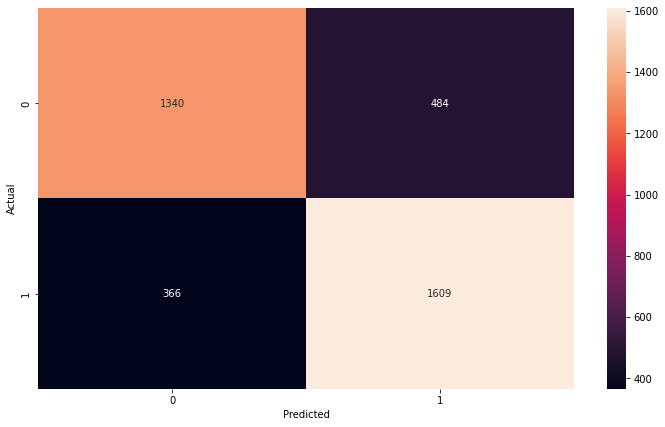

In [152]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [153]:
naive_test_1 = mnb.score(X_test_1, y_test_1)
naive_train_1 = mnb.score(X_train_1, y_train_1)
naive_time_1 = end - start

In [154]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_2, y_train_2)
end = time.time()

In [155]:
y_pred_2 = mnb.predict(X_test_2)

In [156]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1796
           1       0.74      0.76      0.75      2003

    accuracy                           0.73      3799
   macro avg       0.73      0.73      0.73      3799
weighted avg       0.73      0.73      0.73      3799



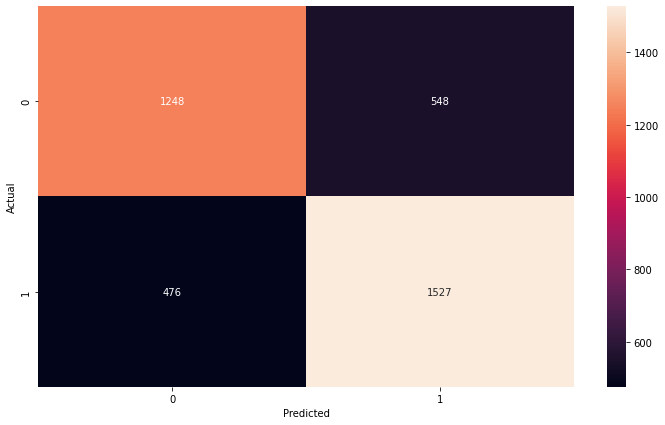

In [157]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [158]:
naive_test_2 = mnb.score(X_test_2, y_test_2)
naive_train_2 = mnb.score(X_train_2, y_train_2)
naive_time_2 = end - start

In [159]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_3, y_train_3)
end = time.time()

In [160]:
y_pred_3 = mnb.predict(X_test_3)

In [161]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1793
           1       0.69      0.69      0.69      2006

    accuracy                           0.68      3799
   macro avg       0.67      0.67      0.67      3799
weighted avg       0.68      0.68      0.68      3799



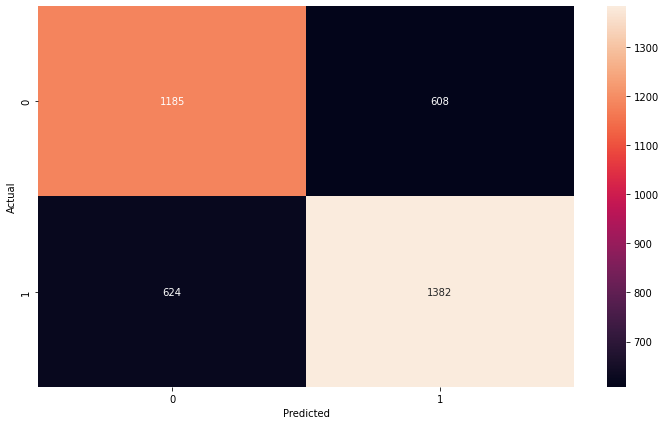

In [162]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [163]:
naive_test_3 = mnb.score(X_test_3, y_test_3)
naive_train_3 = mnb.score(X_train_3, y_train_3)
naive_time_3 = end - start

In [164]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original data', naive_train,naive_test,naive_time])
x.add_row(['Data 1', naive_train_1,naive_test_1,naive_time_1])
x.add_row(['Data 2', naive_train_2,naive_test_2,naive_time_2])
x.add_row(['Data 3', naive_train_3,naive_test_3,naive_time_3])

print(x)

+-------------------+------------------------+------------------------+--------------------------+
|       Models      |      Train Score       |       Test Score       |           Time           |
+-------------------+------------------------+------------------------+--------------------------+
|   Original data   |   0.885306310456011    |   0.8851822608237926   |   0.023709535598754883   |
|       Data 1      |   0.7729665701500394   |   0.7762569097130824   |   0.00726628303527832    |
|       Data 2      |   0.7446360405423194   |   0.7304553829955251   |   0.007217884063720703   |
|       Data 3      |   0.6705278399368172   |   0.6757041326664912   |   0.012873649597167969   |
+-------------------+------------------------+------------------------+--------------------------+


## Logistic Regression

In [165]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_1, y_train_1)
end = time.time()

In [166]:
y_pred_1 = lr.predict(X_test_1)

In [167]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1824
           1       0.84      0.88      0.86      1975

    accuracy                           0.85      3799
   macro avg       0.85      0.85      0.85      3799
weighted avg       0.85      0.85      0.85      3799



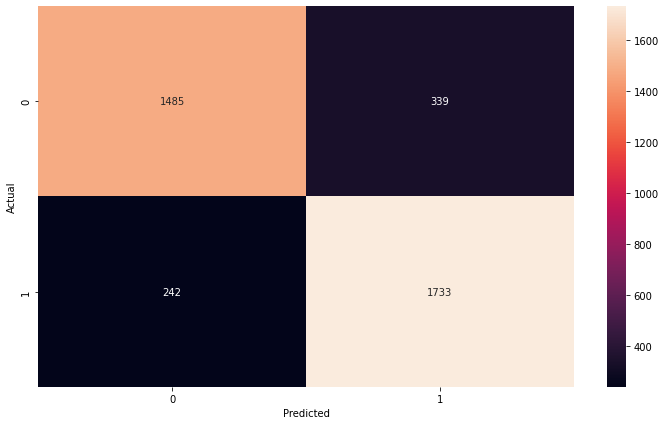

In [168]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [169]:
lr_test_1 = lr.score(X_test_1, y_test_1)
lr_train_1= lr.score(X_train_1, y_train_1)
lr_time_1 = end - start

In [170]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_2, y_train_2)
end = time.time()

In [171]:
y_pred_2 = lr.predict(X_test_2)

In [172]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1796
           1       0.82      0.86      0.84      2003

    accuracy                           0.83      3799
   macro avg       0.83      0.82      0.83      3799
weighted avg       0.83      0.83      0.83      3799



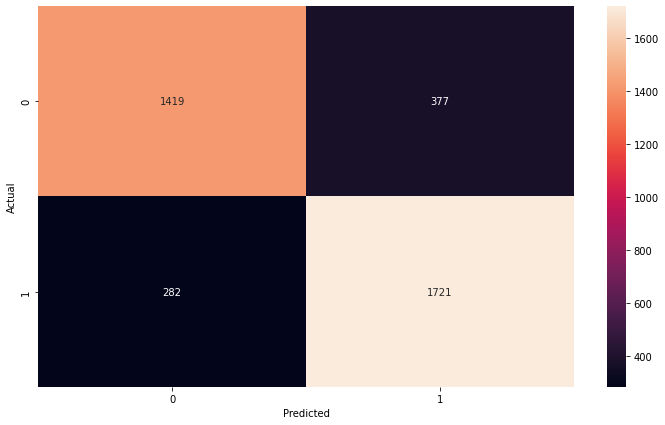

In [173]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [174]:
lr_test_2 = lr.score(X_test_2, y_test_2)
lr_train_2 = lr.score(X_train_2, y_train_2)
lr_time_2 = end - start

In [175]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_3, y_train_3)
end = time.time()

In [176]:
y_pred_3 = lr.predict(X_test_3)

In [177]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1793
           1       0.74      0.83      0.78      2006

    accuracy                           0.76      3799
   macro avg       0.76      0.75      0.75      3799
weighted avg       0.76      0.76      0.76      3799



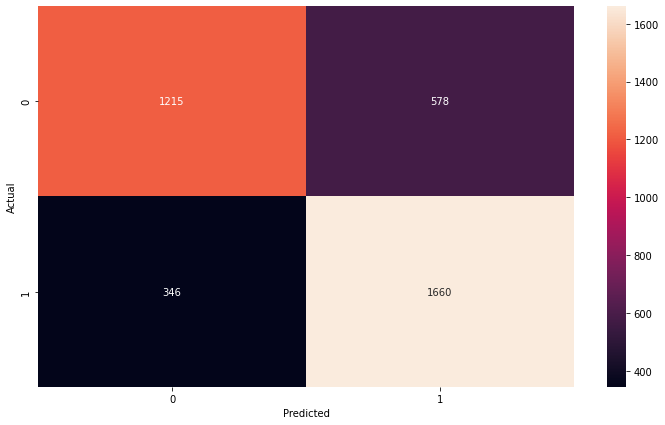

In [178]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [179]:
lr_test_3 = lr.score(X_test_3, y_test_3)
lr_train_3 = lr.score(X_train_3, y_train_3)
lr_time_3 = end - start

In [180]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', lr_train,lr_test,lr_time])
x.add_row(['Data 1', lr_train_1,lr_test_1,lr_time_1])
x.add_row(['Data 2', lr_train_2,lr_test_2,lr_time_2])
x.add_row(['Data 3', lr_train_3,lr_test_3,lr_time_3])

print(x)

+-------------------+------------------------+------------------------+-------------------------+
|       Models      |      Train Score       |       Test Score       |           Time          |
+-------------------+------------------------+------------------------+-------------------------+
|   Original Data   |   0.9299532802526814   |   0.9336754836162653   |    0.4490773677825928   |
|       Data 1      |   0.8456172677020268   |   0.8470650171097658   |   0.11194372177124023   |
|       Data 2      |   0.8273660655521916   |   0.826533298236378    |   0.11634278297424316   |
|       Data 3      |   0.7591812557588522   |   0.7567780994998684   |   0.07997250556945801   |
+-------------------+------------------------+------------------------+-------------------------+


## K-Nearest Neighbours

In [181]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_1, y_train_1)
end = time.time()

In [182]:
y_pred_1 = knn.predict(X_test_1)

In [183]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1824
           1       0.84      0.89      0.86      1975

    accuracy                           0.85      3799
   macro avg       0.85      0.85      0.85      3799
weighted avg       0.85      0.85      0.85      3799



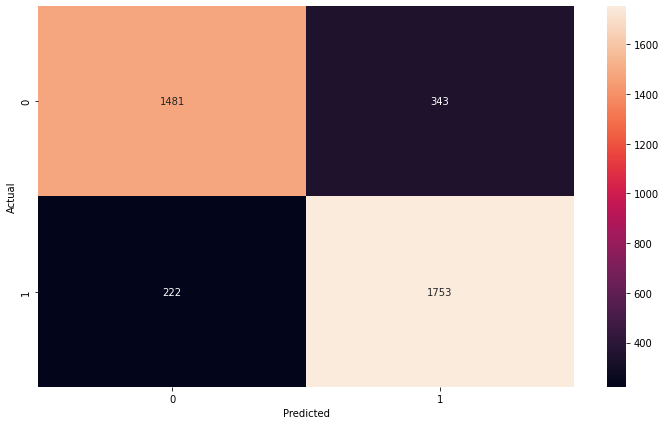

In [184]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [185]:
knn_test_1 = knn.score(X_test_1, y_test_1)
knn_train_1 = knn.score(X_train_1, y_train_1)
knn_time_1 = end - start

In [186]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_2, y_train_2)
end = time.time()

In [187]:
y_pred_2 = knn.predict(X_test_2)

In [188]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1796
           1       0.80      0.86      0.83      2003

    accuracy                           0.81      3799
   macro avg       0.81      0.81      0.81      3799
weighted avg       0.81      0.81      0.81      3799



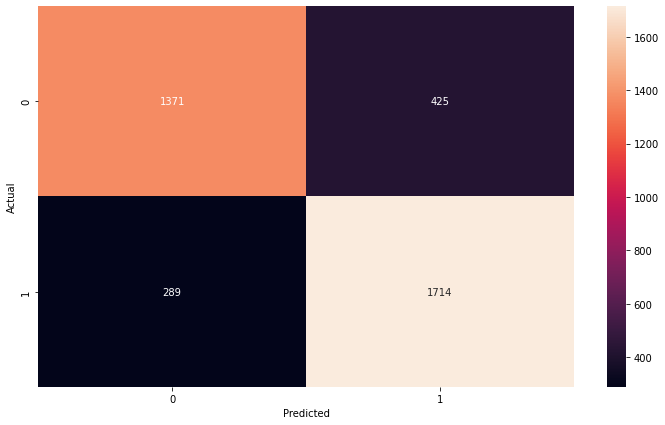

In [189]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [190]:
knn_test_2 = knn.score(X_test_2, y_test_2)
knn_train_2 = knn.score(X_train_2, y_train_2)
knn_time_2 = end - start

In [191]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_3, y_train_3)
end = time.time()

In [192]:
y_pred_3 = knn.predict(X_test_3)

In [193]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1793
           1       0.75      0.78      0.77      2006

    accuracy                           0.75      3799
   macro avg       0.75      0.75      0.75      3799
weighted avg       0.75      0.75      0.75      3799



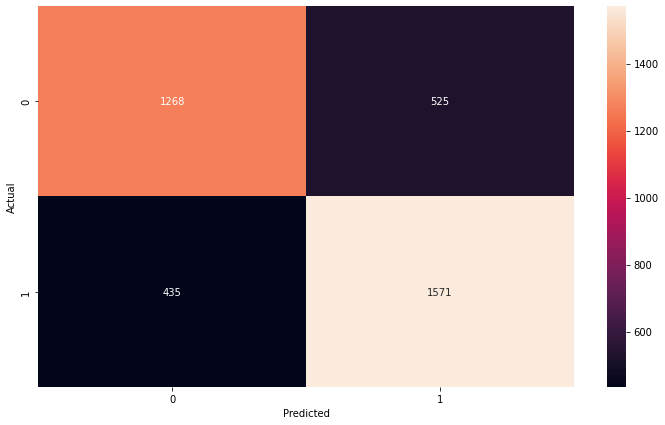

In [194]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [195]:
knn_test_3 = knn.score(X_test_3, y_test_3)
knn_train_3 = knn.score(X_train_3, y_train_3)
knn_time_3 = end - start

In [196]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', knn_train,knn_test,knn_time])
x.add_row(['Data 1', knn_train_1,knn_test_1,knn_time_1])
x.add_row(['Data 2', knn_train_2,knn_test_2,knn_time_2])
x.add_row(['Data 3', knn_train_3,knn_test_3,knn_time_3])

print(x)

+-------------------+------------------------+------------------------+--------------------------+
|       Models      |      Train Score       |       Test Score       |           Time           |
+-------------------+------------------------+------------------------+--------------------------+
|   Original Data   |   0.9470290188853063   |   0.9303855770496118   |   0.013167858123779297   |
|       Data 1      |   0.8769413003421953   |   0.8512766517504606   |   0.007639169692993164   |
|       Data 2      |   0.8624457022508885   |   0.8120558041589893   |   0.00467228889465332    |
|       Data 3      |   0.8253916019481374   |   0.7473019215583048   |   0.00805974006652832    |
+-------------------+------------------------+------------------------+--------------------------+


## Decision Tree

In [197]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_1, y_train_1)
end = time.time()

In [198]:
y_pred_1 = classifier.predict(X_test_1)

In [199]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1824
           1       0.82      0.84      0.83      1975

    accuracy                           0.82      3799
   macro avg       0.82      0.82      0.82      3799
weighted avg       0.82      0.82      0.82      3799



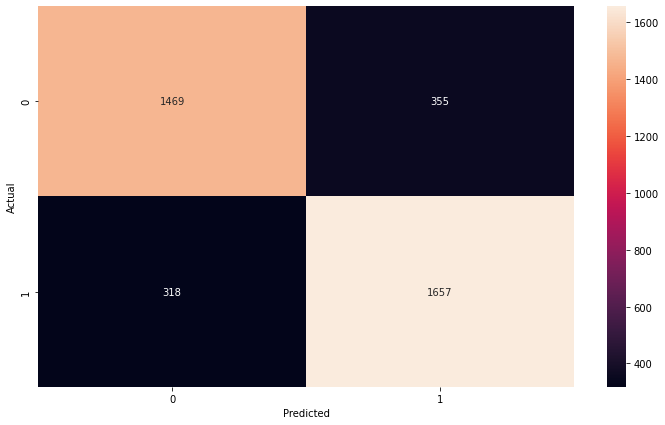

In [200]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [201]:
dtree_test_1 = classifier.score(X_test_1, y_test_1)
dtree_train_1 = classifier.score(X_train_1, y_train_1)
dtree_time_1 = end - start

In [202]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_2, y_train_2)
end = time.time()

In [203]:
y_pred_2 = classifier.predict(X_test_2)

In [204]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1796
           1       0.82      0.82      0.82      2003

    accuracy                           0.81      3799
   macro avg       0.81      0.81      0.81      3799
weighted avg       0.81      0.81      0.81      3799



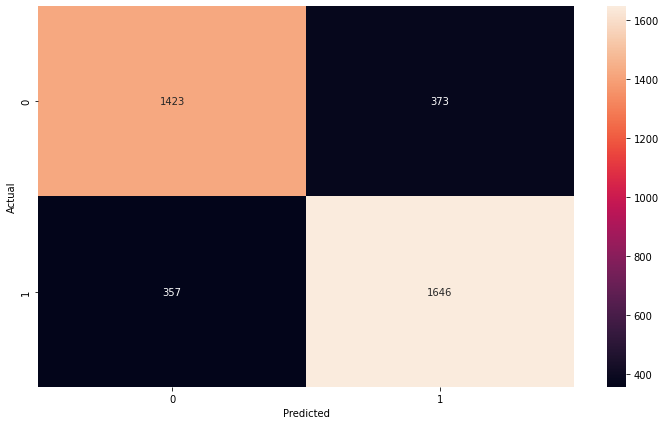

In [205]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [206]:
dtree_test_2 = classifier.score(X_test_2, y_test_2)
dtree_train_2 = classifier.score(X_train_2, y_train_2)
dtree_time_2 = end - start

In [207]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_3, y_train_3)
end = time.time()

In [208]:
y_pred_3 = classifier.predict(X_test_3)

In [209]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1793
           1       0.77      0.77      0.77      2006

    accuracy                           0.76      3799
   macro avg       0.75      0.75      0.75      3799
weighted avg       0.76      0.76      0.76      3799



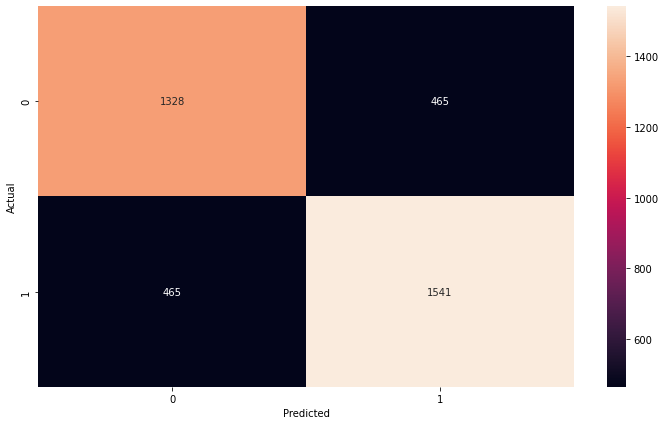

In [210]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [211]:
dtree_test_3 = classifier.score(X_test_3, y_test_3)
dtree_train_3 = classifier.score(X_train_3, y_train_3)
dtree_time_3 = end - start

In [212]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3


x.add_row(['Original Data', dtree_train,dtree_test,dtree_time])
x.add_row(['Data 1', dtree_train_1,dtree_test_1,dtree_time_1])
x.add_row(['Data 2', dtree_train_2,dtree_test_2,dtree_time_2])
x.add_row(['Data 3', dtree_train_3,dtree_test_3,dtree_time_3])

print(x)

+-------------------+-----------------+------------------------+-------------------------+
|       Models      |   Train Score   |       Test Score       |           Time          |
+-------------------+-----------------+------------------------+-------------------------+
|   Original Data   |       1.0       |   0.9293328069482827   |    0.5908689498901367   |
|       Data 1      |       1.0       |    0.82284811792577    |   0.13443660736083984   |
|       Data 2      |       1.0       |   0.8078441695182943   |   0.14226555824279785   |
|       Data 3      |       1.0       |   0.7551987365096078   |   0.13153624534606934   |
+-------------------+-----------------+------------------------+-------------------------+


## Random Forest

In [213]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_1,y_train_1)
end = time.time()
y_pred_1 = clf.predict(X_test_1)

In [214]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1824
           1       0.89      0.88      0.88      1975

    accuracy                           0.88      3799
   macro avg       0.88      0.88      0.88      3799
weighted avg       0.88      0.88      0.88      3799



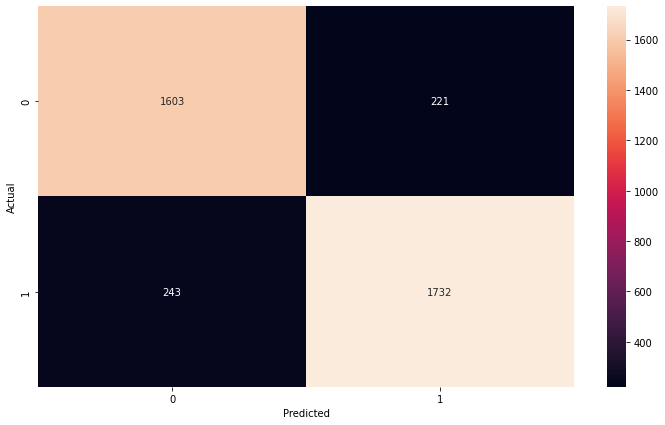

In [215]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [216]:
randomtree_test_1 = clf.score(X_test_1, y_test_1)
randomtree_train_1 = clf.score(X_train_1, y_train_1)
randomtree_time_1 = end - start

In [217]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_2,y_train_2)
end = time.time()
y_pred_2 = clf.predict(X_test_2)

In [218]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1796
           1       0.88      0.86      0.87      2003

    accuracy                           0.87      3799
   macro avg       0.87      0.87      0.87      3799
weighted avg       0.87      0.87      0.87      3799



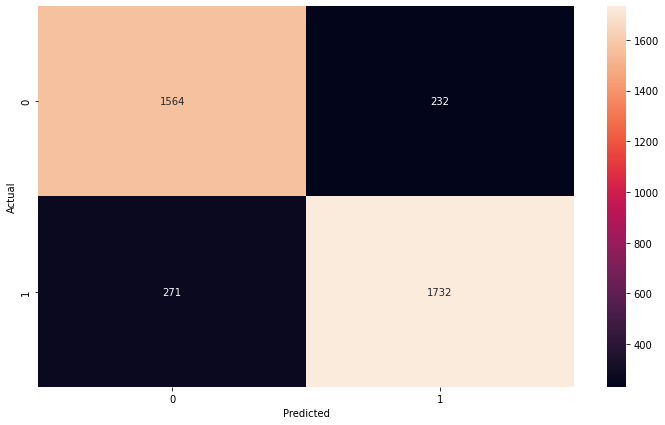

In [219]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [220]:
randomtree_test_2 = clf.score(X_test_2, y_test_2)
randomtree_train_2 = clf.score(X_train_2, y_train_2)
randomtree_time_2 = end - start

In [221]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_3,y_train_3)
end = time.time()
y_pred_3 = clf.predict(X_test_3)

In [222]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1793
           1       0.84      0.82      0.83      2006

    accuracy                           0.82      3799
   macro avg       0.82      0.82      0.82      3799
weighted avg       0.82      0.82      0.82      3799



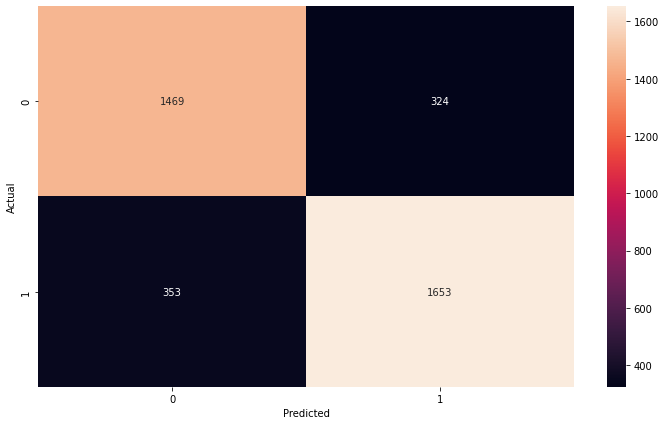

In [223]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [224]:
randomtree_test_3 = clf.score(X_test_3, y_test_3)
randomtree_train_3 = clf.score(X_train_3, y_train_3)
randomtree_time_3 = end - start

In [225]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', randomtree_train,randomtree_test,randomtree_time])
x.add_row(['Data 1', randomtree_train_1,randomtree_test_1,randomtree_time_1])
x.add_row(['Data 2', randomtree_train_2,randomtree_test_2,randomtree_time_2])
x.add_row(['Data 3', randomtree_train_3,randomtree_test_3,randomtree_time_3])
print(x)

+-------------------+-----------------+------------------------+------------------------+
|       Models      |   Train Score   |       Test Score       |          Time          |
+-------------------+-----------------+------------------------+------------------------+
|   Original Data   |       1.0       |   0.9537439136728517   |   94.18942403793335    |
|       Data 1      |       1.0       |   0.8778625954198473   |   19.54431915283203    |
|       Data 2      |       1.0       |   0.8675967359831535   |   19.806527376174927   |
|       Data 3      |       1.0       |   0.8217952092655962   |   20.602676153182983   |
+-------------------+-----------------+------------------------+------------------------+


## xG Boost

In [226]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_1, y_train_1)
end = time.time()

In [227]:
y_pred_1 = model.predict(X_test_1)

In [228]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1824
           1       0.88      0.88      0.88      1975

    accuracy                           0.88      3799
   macro avg       0.88      0.88      0.88      3799
weighted avg       0.88      0.88      0.88      3799



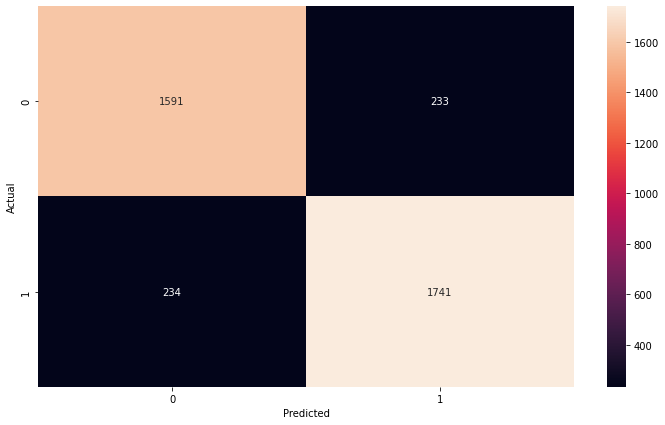

In [229]:
confusion_matrix = pd.crosstab(y_test_1, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [230]:
xg_test_1 = model.score(X_test_1, y_test_1)
xg_train_1 = model.score(X_train_1, y_train_1)
xg_time_1 = end - start

In [231]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_2, y_train_2)
end = time.time()

In [232]:
y_pred_2 = model.predict(X_test_2)

In [233]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1796
           1       0.88      0.87      0.87      2003

    accuracy                           0.87      3799
   macro avg       0.87      0.87      0.87      3799
weighted avg       0.87      0.87      0.87      3799



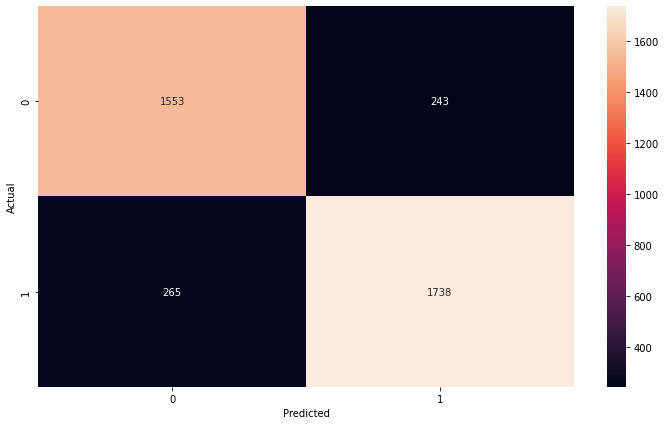

In [234]:
confusion_matrix = pd.crosstab(y_test_2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [235]:
xg_test_2 = model.score(X_test_2, y_test_2)
xg_train_2 = model.score(X_train_2, y_train_2)
xg_time_2 = end - start

In [236]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_3, y_train_3)
end = time.time()

In [237]:
y_pred_3 = model.predict(X_test_3)

In [238]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1793
           1       0.83      0.84      0.83      2006

    accuracy                           0.82      3799
   macro avg       0.82      0.82      0.82      3799
weighted avg       0.82      0.82      0.82      3799



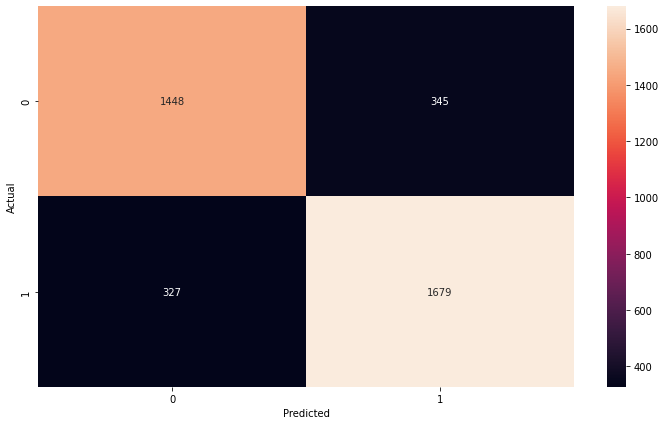

In [239]:
confusion_matrix = pd.crosstab(y_test_3, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [240]:
xg_test_3 = model.score(X_test_3, y_test_3)
xg_train_3 = model.score(X_train_3, y_train_3)
xg_time_3 = end - start

In [241]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', xg_train,xg_test,xg_time])
x.add_row(['Data 1', xg_train_1,xg_test_1,xg_time_1])
x.add_row(['Data 2', xg_train_2,xg_test_2,xg_time_2])
x.add_row(['Data 3', xg_train_3,xg_test_3,xg_time_3])
print(x)

+-------------------+------------------------+------------------------+------------------------+
|       Models      |      Train Score       |       Test Score       |          Time          |
+-------------------+------------------------+------------------------+------------------------+
|   Original Data   |   0.9484931236428242   |   0.9497302276615344   |   3.123387336730957    |
|       Data 1      |   0.8743748354830219   |   0.877072913924717    |   0.7389135360717773   |
|       Data 2      |   0.868763985783862    |   0.8662806001579363   |   0.734036922454834    |
|       Data 3      |   0.8385546926418324   |   0.8231113450908134   |   0.7388112545013428   |
+-------------------+------------------------+------------------------+------------------------+


# Comparison

In [242]:

names2 = ['Naive Bayes','Log. Regression','KNN','Decision Tree','Random Forest','xG Boost']

score = [naive_test,lr_test,knn_test,dtree_test,randomtree_test,xg_test]
score1 = [naive_test_1,lr_test_1,knn_test_1,dtree_test_1,randomtree_test_1,xg_test_1]
score2 = [naive_test_2,lr_test_2,knn_test_2,dtree_test_2,randomtree_test_2,xg_test_2]
score3 = [naive_test_3,lr_test_3,knn_test_3,dtree_test_3,randomtree_test_3,xg_test_3]

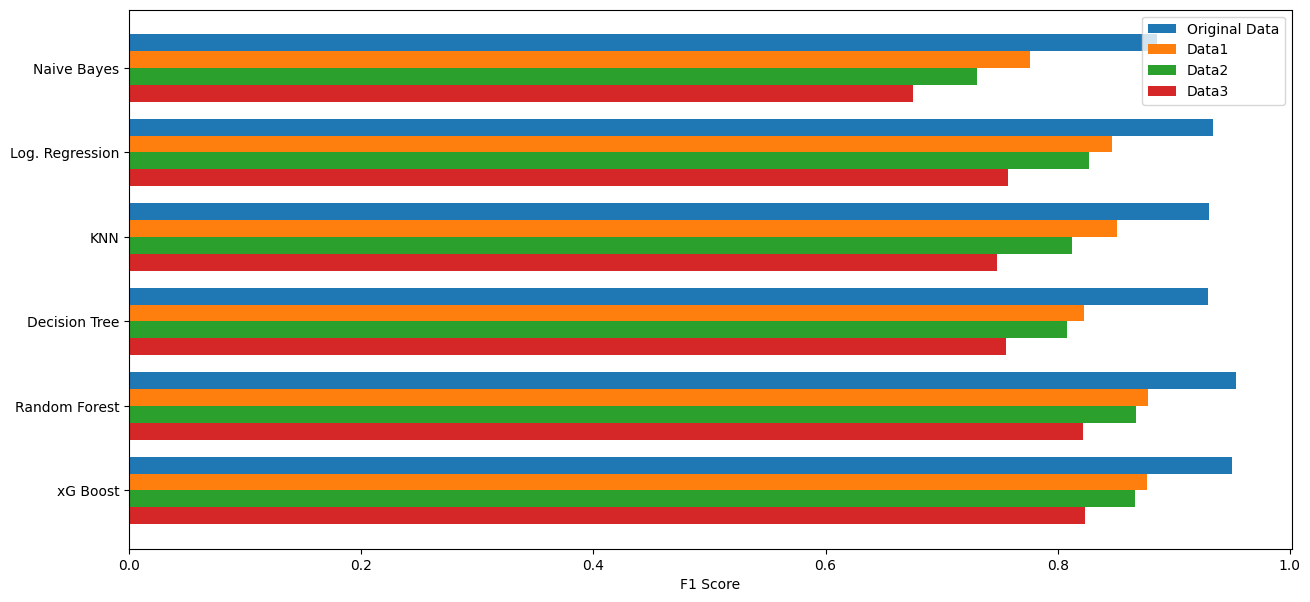

In [243]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names2))

ax.barh(y_pos-0.3, score, 0.2, label = 'Original Data')
ax.barh(y_pos-0.1, score1, 0.2, label = 'Data1')
ax.barh(y_pos+0.1, score2, 0.2, label = 'Data2')
ax.barh(y_pos+0.3, score3, 0.2, label = 'Data3')


ax.set_yticks(y_pos)
ax.set_yticklabels( names2)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('F1 Score')

plt.legend()
plt.show()

In [244]:
train_score3 = [naive_train_3,lr_train_3,knn_train_3,dtree_train_3,randomtree_train_3,xg_train_3]

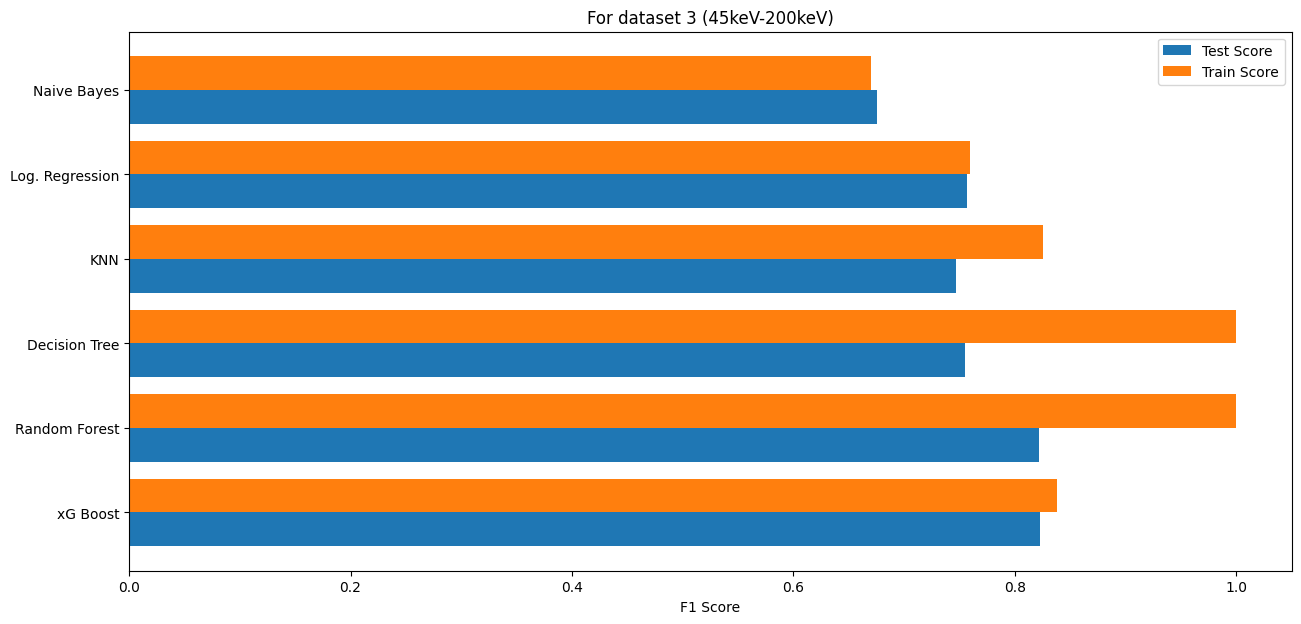

In [245]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names2))

ax.barh(y_pos+0.2, score3, 0.4, label = 'Test Score')
ax.barh(y_pos-0.2, train_score3, 0.4, label = 'Train Score')



ax.set_yticks(y_pos)
ax.set_yticklabels( names2)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_title("For dataset 3 (45keV-200keV)")
ax.set_xlabel('F1 Score')

plt.legend()
plt.show()